The aim of the challenge is to figure out ways to efficiently simulate the Riemann-Liouville fractional Brownian motion:
$$  X_t = \nu  \int_0^t  K(t,s) dW_s, $$
with
$$ K(t,s) = \frac{1}{\Gamma(H + 1/2)} (t - s)^{H-1/2} 1_{s<t}$$
and $H<1/2$.

The covariance kernel of $X$ is given in the following closed form
\begin{align}
\Sigma_0(s,u)&=\frac{\nu^2}{\Gamma(H+1/2)^2}\int_0^{s\wedge u} (s-z)^{H-1/2}(u-z)^{H-1/2}dz\\
&=\frac{\nu^2}{\Gamma(\alpha)\Gamma(1+\alpha)}\frac{s^{\alpha}}{u^{1-\alpha}} \; {}_{2}F_{1}\left( 1, 1-\alpha; 1+\alpha ; \frac s u\right)
\end{align}
where $\alpha=H+1/2$ and  ${}_{2}F_{1}$ is the Gaussian hypergeometric function.

**Guidelines**
- Implement and briefly explain and comment the methods. We are interested in low regimes of $H$. Plot the sample paths on same gaussian increments, to compare paths by paths. You can take $T=1.$ and $n_{steps}=300$ time steps uniformly spaced on $[0,T]$. (set $\nu=1$).  
- Two metrics : running time (using "timeit) to simulate one trajectory and MSE error of the paths wrt to the exact path simulated using cholesky method:
$$MSE = \sqrt{\frac 1 {n_{steps}} \sum_{i=1}^{n_{steps}} \left(X^{\mbox{method}}_{t_i} - X^{\mbox{cholesky}}_{t_i}\right)^2 }   $$


**Question:** Detail the computations that lead to the covariance kernel. Is it valid for $H\leq 1/2$, $H\geq 1/2$? both?

**Answer:**
\begin{aligned} cov(X_t, X_s) &= E(X_s X_t) \\
 &= \nu^2 E(\int_0^t K(t, u) dW_u \int_0^s K(s, v) dW_v) \\
 &= \frac{\nu^2}{\Gamma(H + 1/2)^2} E(\int (t - u)^{H - 1/2} 1_{u \in [0, t]} dW_u \int (s - v)^{H - 1/2} 1_{v \in [0, s]} dW_v) \\
 &= \frac{\nu^2}{\Gamma(H + 1/2)^2} \int E((s - u)^{H - 1/2} (t - u)^{H - 1/2} 1_{u \in [0, s]} 1_{u \in [0, t]}) du \\
 &= \frac{\nu^2}{\Gamma(H + 1/2)^2} \int_{0}^{min(s, t)} (s - u)^{H - 1/2} (t - u)^{H - 1/2} du \\
 \end{aligned}


Dans le cas t > s:
\begin{aligned} \int_{0}^{min(s, t)} (s - u)^{H - 1/2} (t - u)^{H - 1/2} du
&= s^{H - 1/2} t^{H - 1/2} \int_{0}^s (1 - u/s)^{H - 1/2} (1 - u/t)^{H - 1/2} du \\
&= s^{\alpha - 1} t^{\alpha - 1} \int_{0}^s (1 - u/s)^{\alpha - 1} (1 - u/t)^{\alpha - 1} du \\
&= s^{\alpha} t^{\alpha - 1} \int_{0}^1 (1 - u)^{\alpha - 1} (1 - (s/t)u)^{\alpha - 1} du \\
\end{aligned}

Et

\begin{aligned}
\int_{0}^1 (1 - u)^{\alpha - 1} (1 - (s/t)u)^{\alpha - 1} du &= \int_0^1 (1-u)^{\alpha - 1} \sum_0^{\infty} \frac{(\alpha - 1)_n}{n!}(-s/t)^n u^n du \\ &= \sum_0^{\infty} \frac{(\alpha - 1)_n}{n!}(-s/t)^n \int_0^1(1-u)^{\alpha - 1} u^n du \\ &= \sum_0^{\infty} \frac{(\alpha - 1)_n}{n!}(-s/t)^n \int_0^1(1-u)^{\alpha - 1} u^n du \\
 &= \sum_0^{\infty} \frac{(\alpha - 1)_n}{n!}(-s/t)^n \frac{\Gamma(n + 1) \Gamma(\alpha)}{\Gamma(n + \alpha + 1)} \\ &= \Gamma(\alpha)\sum_0^{\infty} \frac{(\alpha - 1)_n}{n!}(-s/t)^n \frac{n!}{\Gamma(n + \alpha + 1)} \\
 &=\frac{\Gamma(\alpha)}{\Gamma(\alpha + 1)} \sum_0^{\infty} (\alpha - 1)_n \frac{n! \Gamma(\alpha + 1)}{\Gamma(n + \alpha + 1)} \frac{(-s/t)^n }{n!} \\
 &=\frac{\Gamma(\alpha)}{\Gamma(\alpha + 1)} \sum_0^{\infty} (1 - \alpha)_n \frac{(1)_n}{(\alpha + 1)_n} \frac{(s/t)^n }{n!} \\ &= \frac{\Gamma(\alpha)}{\Gamma(\alpha + 1)} (2F1)(1, \alpha - 1, \alpha + 1, s/t)
\end{aligned}

Et donc en reprenant le resultat précédent:

$$cov(X_t, X_s) = s^{\alpha} t^{\alpha - 1} \frac{\nu^2}{\Gamma(\alpha) \Gamma(\alpha + 1)} (2F1)(1, \alpha - 1, \alpha +1, s/t)$$

On obtient bien le résultat attendu.
Dans les dernières égalitées, on a utilise:
$$(1)_n = n!$$
$$\Gamma(\alpha + n)/\Gamma(\alpha) = (\alpha)_n$$
$$(b)_n = (-1)^n (-b)_n$$

Several options and suggestions detailed below:
- Cholesky
- Different Euler schemes
- multifactor euler vs exact (cholesky on factors)


<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">1. Exact simulation using Cholesky</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from scipy.special import gamma, gammainc
from scipy.integrate import quad

In [ ]:
T = 1
n_step = 300
t = np.linspace(0, T, n_step)
dt = T/n_step
nu = 1

Z = np.random.normal(0, 1, n_step)

In [ ]:
def sigma(t, H = 0.1):
  """
  Computes the covariance matrix sigma0 for a given time vector t and parameter H.
  """
  alpha = H + 0.5
  sigma0 = np.zeros((t.shape[0], t.shape[0]))
  for i in range(0, t.shape[0]):
    for j in range(i, t.shape[0]):
      sigma0[i, j] = ((nu**(2) * (t[i]**(alpha)))/(gamma(alpha) * gamma(1 + alpha) * t[j]**(1 - alpha))) * sc.hyp2f1(1, 1 - alpha, 1 + alpha, t[i]/t[j])
      sigma0[j, i] = sigma0[i, j]
  return sigma0

def sigma_numpy(t, H = 0.1):
  """
  Computes the covariance matrix sigma0 using NumPy operations for efficiency.
  """
  alpha = H + 0.5
  t1 = t.reshape(1,-1)
  t2 = t1.T
  sigma0 = ((nu**(2) * (t1**(alpha)))/(gamma(alpha) * gamma(1 + alpha) * t2**(1 - alpha))) * sc.hyp2f1(1, 1 - alpha, 1 + alpha, t1/t2)
  return sigma0



def X_cholesky(t, H, Z, version = "None"):
  """
  Generates a stochastic process using the Cholesky decomposition of the covariance matrix.
  """
  if version == "None":
    sigma0 = sigma(t[1:], H)
  if version == "numpy":
    sigma0 = sigma_numpy(t[1:], H)
  L = np.linalg.cholesky(sigma0)
  return np.concatenate(([0], np.dot(L, Z[1:])))

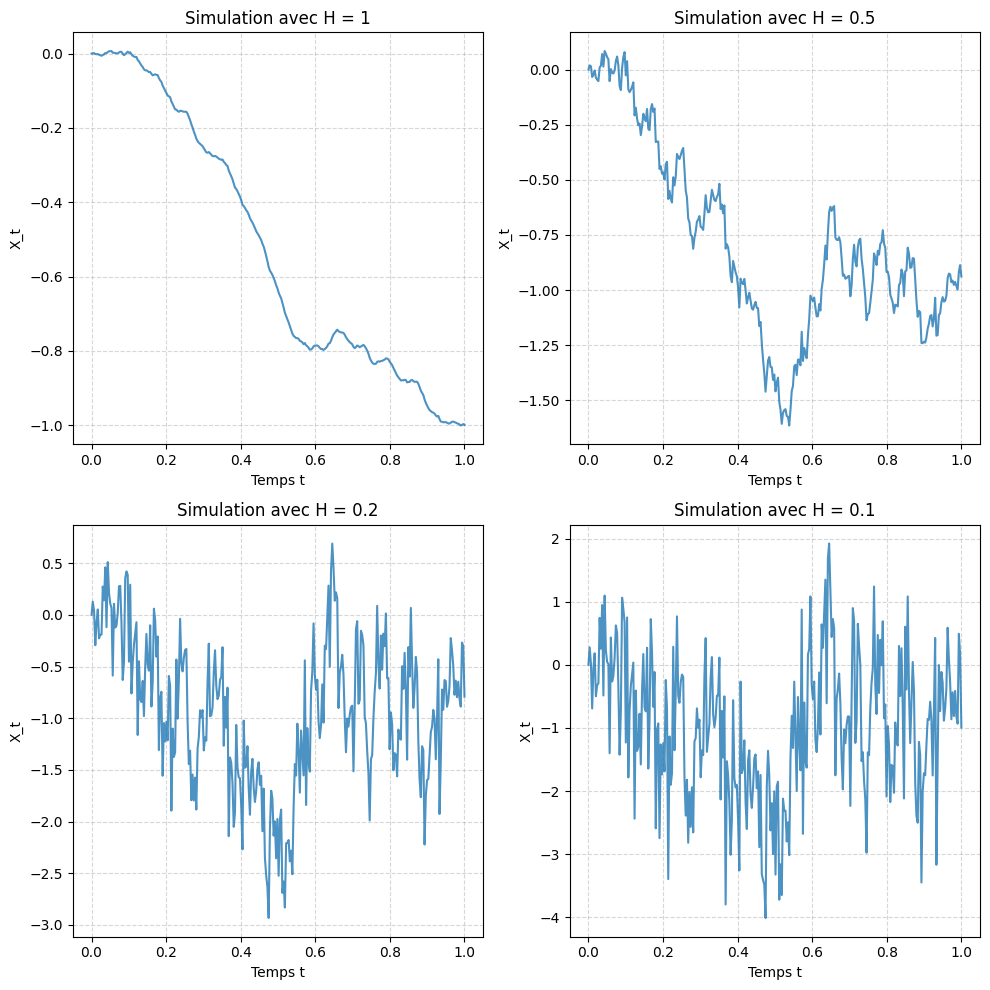

In [ ]:
H_values = [1, 0.5, 0.2, 0.1]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, H in zip(axes.flat, H_values):
    ax.plot(t, X_cholesky(t, H, Z), alpha=0.8)
    ax.set_title(f"Simulation avec H = {H}", fontsize=12)
    ax.set_xlabel("Temps t")
    ax.set_ylabel("X_t")
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
print('normal version')
%timeit X_cholesky(t, 0.1, Z)
print('numpy version')
%timeit X_cholesky(t, 0.1, Z, "numpy")

normal version
353 ms ± 5.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
numpy version
56.2 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">2. Euler Schemes</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

We will consider three (modified) Euler schemes after writing
$$ X_{t_i} = X_0 + \sum_{j=1}^i \underbrace{\int_{t_{j-1}}^{t_j} K(t_i,s) dW_s}_{Y^{i}_j}. $$

1. **EULER 1** Naive: $$ X_{t_i} = X_0 + \nu \sqrt{dt}\sum_{j=1}^i K(t_i,t_{j-1}) Z_j $$
with $Z_j \sim \mathcal N(0,1)$ iid.

2. **EULER 2** Write $dW_s \approx Z_j \frac{ds}{\sqrt{dt}}$ so that
$$ X_{t_i} = X_0 + \nu \sum_{j=1}^i w_j^i Z_j $$
with
$$ w_j^i =   \frac{1}{\sqrt{dt}}\int_{t_{j-1}}^{t_j} K(t_i,s) ds =  \int_{t_{j-1}}^{t_j} K(t_i,s) ds  =   \frac{1}{\sqrt{dt}} \frac{1}{\Gamma(H + 0.5)(H + 0.5)} \left( (t_i - t_{j-1})^{H+0.5} - (t_i - t_{j})^{H+0.5} \right)$$
3. **EULER 3** Observe that $(Y^i_1, \ldots, Y^i_i)$ is a centered Gaussian vector with independent components such that the std of the j-th component is
$$  \tilde w^i_j = \sqrt{\int_{t_{j-1}}^{t_j} K(t_i,s)^2 ds} = \frac{1}{\Gamma(H + 0.5)} \sqrt{\frac{\left( (t_i - t_{j-1})^{2H} - (t_i - t_{j})^{2H} \right)}{2H}}$$
so that we use
$$ X_{t_i} \approx X_0 + \nu \sum_{j=1}^i    \tilde w^i_j Z_j.$$
Note that the simulation is not exact since $$\mathbb E[Y_j^i Y_{j'}^{i'} ] = \int_{t_{j-1}}^{t_j} K(t_i, s) K(t_{i'},s) ds 1_{j=j'} $$,  whereas in the approximation $\mathbb E[\tilde Y_j^i \tilde Y_{j'}^{i'} ] = w^{i}_j w^{i'}_j $. ($\fbox{to double check}$)


$\textbf{Reference}$: Rambaldi, S., & Pinazza, O. (1994). An accurate fractional Brownian motion generator. Physica A: Statistical Mechanics and its Applications, 208(1), 21-30.


Compare on graphs + MSE that the Naive Euler scheme is way off for small values of $H<0.05$. Works fine for bigger values of $H>0.3$... etc...

**(!)** Please stick to the names **EULER 1**, **EULER 2**, **EULER 3**.



---


On a $Y_j^i = \int_{t_{j-1}}^{t_j} K(t_i, s) dW_s$ et $\tilde{Y}_j^i = \tilde{w}_j^i Z_j$
    
La variance de  $Y_j^i$ est :
$$E[Y_j^i Y_{j'}^{i'}] = \int_{t_{j-1}}^{t_j} K(t_i, s) K(t_{i'}, s) ds 1_{j = j'}.$$
et
$$E[\tilde{Y}_j^i \tilde{Y}_{j'}^{i'}] = \tilde{w}_j^i \tilde{w}_{j'}^{i'} \cdot \mathbb{E}[Z_j Z_{j'}] = \tilde{w}_j^i \tilde{w}_{j'}^{i'} 1_{j = j'} = \sqrt{\int_{t_{j-1}}^{t_j} K(t_i, s)^2 ds} \cdot \sqrt{\int_{t_{j-1}}^{t_j} K(t_{i'}, s)^2 ds} 1_{j = j'} $$

A priori les deux termes n'ont pas de raison d'être les mêmes.

Example of expected graph for sample path:



<img src="images/pathsex.png" alt="Transposition of a vector" title="Vector transposition" width="400">



In [ ]:
def plot_schema(schema, title = ""):
  """
  Fonction utilisée pour plot les schémas
  """
  plt.figure(figsize=(12, 7))
  plt.plot(t, schema, color='royalblue', linewidth=1.5, alpha=0.9)
  plt.title(title, fontsize=16, fontweight='bold')
  plt.xlabel("t", fontsize=14)
  plt.ylabel("X_t", fontsize=14)
  plt.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.6)
  plt.show()

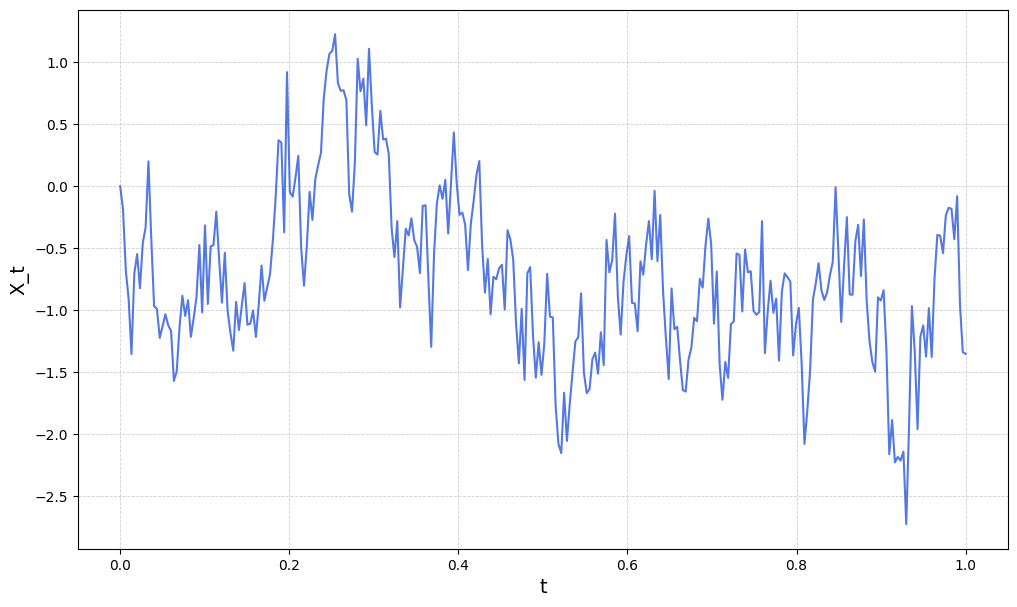

In [ ]:
Z = np.random.normal(loc=0, scale=1, size=len(t))

def euler_1(t, H, Z):
  """
  Simulates a fractional Brownian motion using the first Euler scheme with a loop.
  """
  X = np.zeros(len(t))
  X[0] = 0
  mult = nu * np.sqrt(dt) * (1/gamma(H + 1/2))
  for i in range(1, len(t)):
    sum_term = sum((t[i] - t[j-1])**(H - 1/2) * Z[j] for j in range(1, i+1))
    X[i] = X[0] + sum_term * mult
  return X

def euler_1_numpy(t, H, Z):
  """
  Simulates a fractional Brownian motion using a vectorized first Euler scheme.
  """
  t1 = t.reshape(1,-1)
  t2 = t1.T
  mat = np.where((t2-t1)>dt/2,(np.abs(t2-t1))**(H-1/2),0)
  mult = nu * np.sqrt(dt) * (1/gamma(H + 1/2))
  mat*=mult
  return mat @ np.concatenate((Z[1:],[Z[0]]))

plot_schema(euler_1_numpy(t, 0.1, Z))

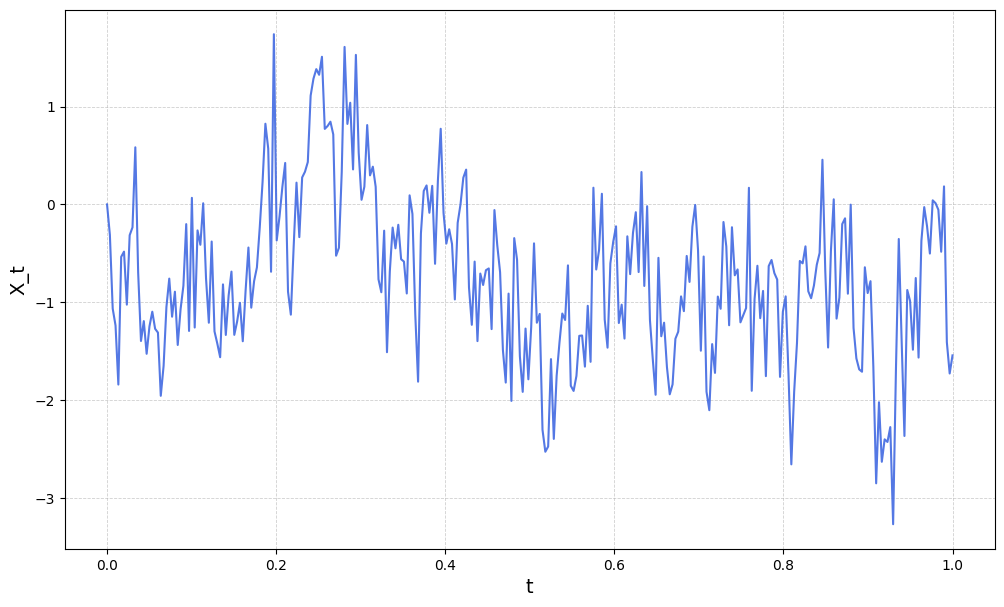

In [ ]:
def euler_2(t, H, Z):
  """
  Simulates a fractional Brownian motion using the second Euler scheme with a loop.
  """
  X = np.zeros(len(t))
  X[0] = 0
  mult = nu / (gamma(H + 1/2) * (H + 1/2) * (dt) ** (1/2))
  for i in range(1, len(t)):
    sum_term = sum([((t[i] - t[j-1])**(H + 1/2) - (t[i] - t[j])**(H + 1/2)) * Z[j] for j in range(1, i+1)])
    X[i] = X[0] + sum_term * mult
  return X

def euler_2_numpy(t, H, Z):
  """
  Simulates a fractional Brownian motion using a vectorized second Euler scheme.
  """
  t1 = t.reshape(1,-1)
  t2 = t1.T
  t3 = np.roll(t1,-1)
  mat = np.where((t2-t1)>0,np.power((t2-t1),H+0.5) - np.power((t2-t3),H+0.5),0)
  mult = nu * (1/np.sqrt(dt)) * (1/(gamma(H + 1/2)*(H+1/2)))
  mat*=mult
  return mat @ np.concatenate((Z[1:],[Z[0]]))




plot_schema(euler_2_numpy(t, 0.1, Z))

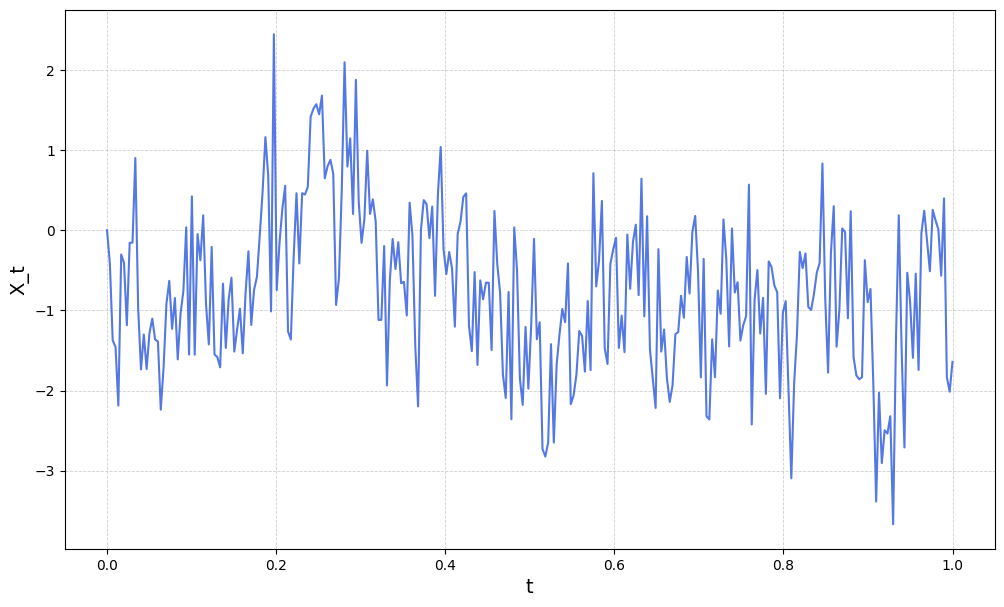

In [ ]:
def euler_3(t, H, Z):
  """
  Simulates a fractional Brownian motion using the third Euler scheme with a loop.
  """
  X = np.zeros(len(t))
  X[0] = 0
  mult = nu/gamma(H + 1/2)
  for i in range(1, len(t)):
    sum_term = sum([(((t[i] - t[j-1])**(2*H) - (t[i] - t[j])**(2*H))/(2*H))**(1/2) * Z[j] for j in range(1, i+1)])
    X[i] = X[0] + sum_term * mult
  return X

def euler_3_numpy(t, H, Z):
  """
  Simulates a fractional Brownian motion using a vectorized third Euler scheme.
  """
  t1 = t.reshape(1,-1)
  t2 = t1.T
  t3 = np.roll(t1,-1)

  mat = np.where((t2-t1)>0,np.sqrt(((t2-t1)**(2*H) - (t2-t3)**(2*H))/(2*H)),0)
  mult = nu * 1/gamma(H + 1/2)
  mat*=mult
  return mat @ np.concatenate((Z[1:],[Z[0]]))

plot_schema(euler_3_numpy(t, 0.1, Z))

In [ ]:
Z = np.random.normal(0, 1, len(t))

print("normal version")
%timeit euler_1(t, 0.1, Z)
%timeit euler_2(t, 0.1, Z)
%timeit euler_3(t, 0.1, Z)

print("numpy version")
%timeit euler_1_numpy(t, 0.1, Z)
%timeit euler_2_numpy(t, 0.1, Z)
%timeit euler_3_numpy(t, 0.1, Z)

normal version
49.4 ms ± 9.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.5 ms ± 858 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
61.1 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
numpy version
6.47 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.05 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.53 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
print("normal version")
%timeit euler_1(t, 0.4, Z)
%timeit euler_2(t, 0.4, Z)
%timeit euler_3(t, 0.4, Z)

print("numpy version")
%timeit euler_1_numpy(t, 0.4, Z)
%timeit euler_2_numpy(t, 0.4, Z)
%timeit euler_3_numpy(t, 0.4, Z)

normal version
28.9 ms ± 607 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.2 ms ± 652 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
82.5 ms ± 24.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
numpy version
3.93 ms ± 60.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.97 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.89 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


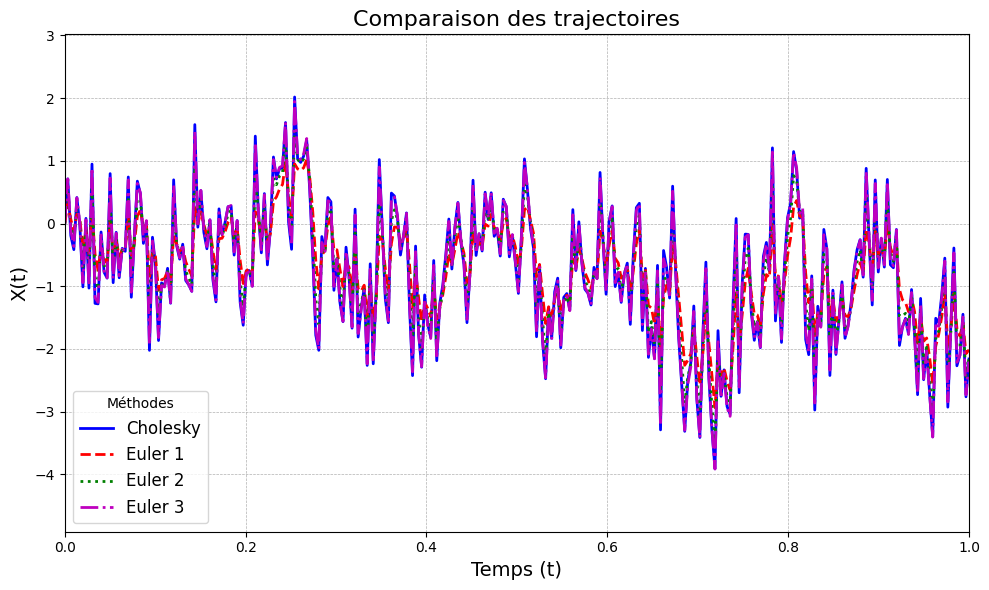

In [ ]:
X_chol = X_cholesky(t, 0.1, Z)
euler1 = euler_1(t, 0.1, Z)
euler2 = euler_2(t, 0.1, Z)
euler3 = euler_3(t, 0.1, Z)

plt.figure(figsize=(10, 6))

plt.plot(t, X_chol, label='Cholesky', color='b', linestyle='-', linewidth=2)
plt.plot(t, euler1, label='Euler 1', color='r', linestyle='--', linewidth=2)
plt.plot(t, euler2, label='Euler 2', color='g', linestyle=':', linewidth=2)
plt.plot(t, euler3, label='Euler 3', color='m', linestyle='-.', linewidth=2)

plt.title('Comparaison des trajectoires', fontsize=16)
plt.xlabel('Temps (t)', fontsize=14)
plt.ylabel('X(t)', fontsize=14)
plt.legend(title='Méthodes', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xlim(t[0], t[-1])
plt.ylim(np.min([X_chol, euler1, euler2, euler3]) - 1, np.max([X_chol, euler1, euler2, euler3]) + 1)

plt.tight_layout()
plt.show()

In [ ]:
def comparaison0(M, H, print_ = True):
  """
  étant donné un nombre de trajectoire M et un indice H, la fonction
  comparaison0 calcule les RMSE de chaque schéma pour chaque trajectoire et fait
  une moyenne sur les M trajectoires.
  Elle retourne les 3 moyennes.
  """
  MSE_euler_1 = 0
  MSE_euler_2 = 0
  MSE_euler_3 = 0
  for i in range(M):
    Z = np.random.normal(0, 1 , n_step)
    X = X_cholesky(t, H, Z)
    X_euler_1 = euler_1(t, H, Z)
    X_euler_2 = euler_2(t, H, Z)
    X_euler_3 = euler_3(t, H, Z)
    dX_euler_1 = X - X_euler_1
    dX_euler_2 = X - X_euler_2
    dX_euler_3 = X - X_euler_3
    MSE_euler_1 += np.mean(dX_euler_1**2)**(1/2)
    MSE_euler_2 += np.mean(dX_euler_2**2)**(1/2)
    MSE_euler_3 += np.mean(dX_euler_3**2)**(1/2)

  if print_ == True:
    print("Avec H = " + str(H))
    print("RMSE pour Euler_1 : " + str(MSE_euler_1/M))
    print("RMSE pour Euler_2 : " + str(MSE_euler_2/M))
    print("RMSE pour Euler_3 : " + str(MSE_euler_3/M))
    print()

  return MSE_euler_1/M, MSE_euler_2/M, MSE_euler_3/M

comparaison0(20, 0.01)
comparaison0(20, 0.1)
comparaison0(20, 0.4)
print()

Avec H = 0.01
RMSE pour Euler_1 : 3.3836184010409966
RMSE pour Euler_2 : 2.8695566811997715
RMSE pour Euler_3 : 0.329838780236973

Avec H = 0.1
RMSE pour Euler_1 : 0.5043156806986494
RMSE pour Euler_2 : 0.2538583022235365
RMSE pour Euler_3 : 0.0566691936519626

Avec H = 0.4
RMSE pour Euler_1 : 0.012717369351808838
RMSE pour Euler_2 : 0.0015388461061931911
RMSE pour Euler_3 : 0.0004910448901151046




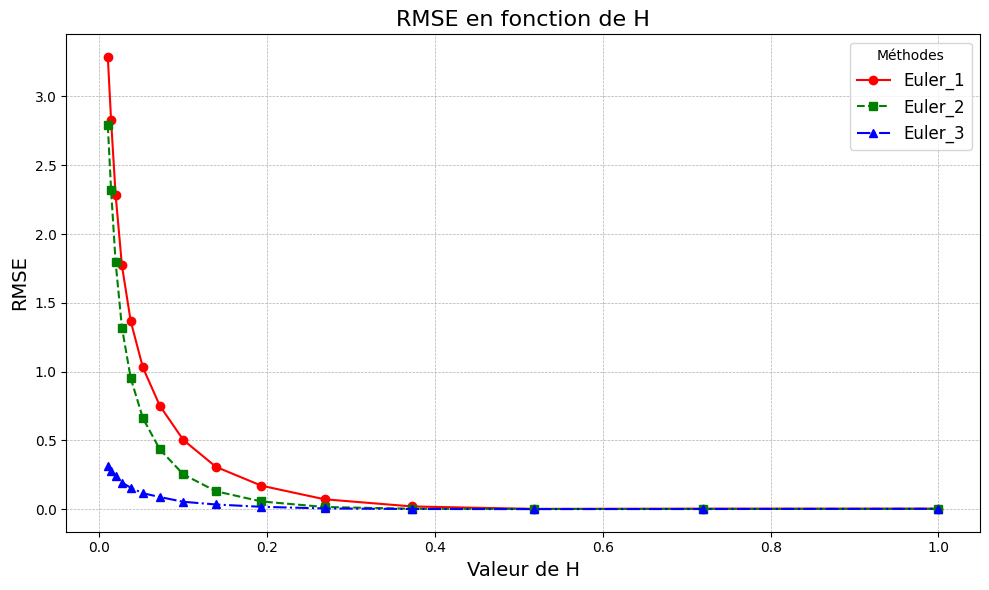

In [ ]:
M = 5

H_values = np.logspace(-2, 0, 15)

MSE_euler_1_list = []
MSE_euler_2_list = []
MSE_euler_3_list = []

for H in H_values:
    MSE_euler_1, MSE_euler_2, MSE_euler_3 = comparaison0(M, H, print_=False)
    MSE_euler_1_list.append(MSE_euler_1)
    MSE_euler_2_list.append(MSE_euler_2)
    MSE_euler_3_list.append(MSE_euler_3)

plt.figure(figsize=(10, 6))

plt.plot(H_values, MSE_euler_1_list, label="Euler_1", marker='o', linestyle='-', color='r')
plt.plot(H_values, MSE_euler_2_list, label="Euler_2", marker='s', linestyle='--', color='g')
plt.plot(H_values, MSE_euler_3_list, label="Euler_3", marker='^', linestyle='-.', color='b')

plt.title("RMSE en fonction de H", fontsize=16)
plt.xlabel("Valeur de H", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.legend(title="Méthodes", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">3. Multifactor approximations</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

Based on
- Abi Jaber, E., & El Euch, O. (2019). Multifactor approximation of rough volatility models. SIAM Journal on Financial Mathematics, 10(2), 309-349. https://arxiv.org/abs/1801.10359
- Abi Jaber, E. (2019). Lifting the Heston model. Quantitative Finance, 19(12), 1995-2013. https://arxiv.org/abs/1810.04868

$$ X_t \approx X_0 + \nu \sum_{k=1}^n  c_k Y^{k}_t$$
with $$  Y^k_t = \int_0^t e^{-x_k(t-s)}dW_s$$
$$  Y^k_{t_i} = e^{-x_k h} Y^k_{t_{i-1}} + \xi_i^k , \quad \xi_i^k = \int_{t_{i-1}}^{t_i}e^{-x_k(t_i-s)}dW_s$$
with the parametrization:

    
$$ c^n_i = \frac{(r_n^{(1-\alpha)}-1) r_n^{(\alpha-1)(1+n/2)}}{\Gamma(\alpha)\Gamma(1-\alpha)(1-\alpha)}r_n^{(1-\alpha)i},  \quad  x^n_i = \frac{1-\alpha}{2-\alpha} \frac{r_n^{2-\alpha}-1}{r_n^{1-\alpha}-1} r_n^{i-1-n/2},$$
		where $\alpha:=H+1/2$, with a geometric repartition $\eta^n_i=r_n^i$ for some $r_n$ such that
		$$  r_n \downarrow 1 \quad \mbox{and} \quad n \ln r_n \to \infty, \quad \mbox{as } n \to \infty.$$


We denote by
$$ K_n(t) = \sum_{i=1}^n c_i e^{-x_i t}. $$

The first step is to determine a good value or $r_n$ for a choice of $n$, $H$ and $T$.  For this, for a given $H,n,T$,  we can choose $r_n$ to minimize
$$ \int_0^T |K_n(t)-K(t)|^2 dt $$

**Question:** Develop the expression (by developing the square) and show that it admits an explicit expression in terms of incomplete gamma function. Write a minimization function to find r and sanity check with the following table ($H=0.1$, $T=0.5$)

<img src="images/tablr.png" alt="Transposition of a vector" title="Vector transposition" width="400">


**Answer:**

We aim to minimize the integral:

$$
\int_0^T |K_n(t) - K(t)|^2 \, dt
$$
where:
$$
K_n(t) = \sum_{i=1}^n c_i e^{-x_i t}, \quad K(t) = \frac{t^{H - \frac{1}{2}}}{\Gamma(H+1/2)}.
$$

Expanding the Square:

$$
\int_0^T |K_n(t) - K(t)|^2 \, dt = \int_0^T K_n(t)^2 \, dt - 2 \int_0^T K_n(t) K(t) \, dt + \int_0^T K(t)^2 \, dt.
$$


1. For $K_n(t)^2 $:

$$
K_n(t)^2 = \left(\sum_{i=1}^n c_i e^{-x_i t}\right)^2 = \sum_{i=1}^n \sum_{j=1}^n c_i c_j e^{-(x_i + x_j)t}.
$$
The integral becomes:
$$
\int_0^T K_n(t)^2 \, dt = \sum_{i=1}^n \sum_{j=1}^n c_i c_j \int_0^T e^{-(x_i + x_j)t} \, dt = \sum_{i=1}^n \sum_{j=1}^n c_i c_j \frac{1 - e^{-(x_i + x_j)T}}{x_i + x_j}.
$$


2. For $K_n(t)K(t)$:

$$
\int_0^T K_n(t) K(t) \, dt = \int_0^T \sum_{i=1}^n c_i e^{-x_i t} \frac{t^{H - \frac{1}{2}}}{\Gamma(H+1/2)} \, dt = \sum_{i=1}^n c_i \int_0^T e^{-x_i t} \frac{t^{H - \frac{1}{2}}}{\Gamma(H+1/2)} \, dt.
$$
With a change of variable $u=x_i t$, this integral can be expressed using the incomplete gamma function:
$$
\int_0^T e^{-x_i t} \frac{t^{H - \frac{1}{2}}}{\Gamma(H+1/2)} \, dt = x_i^{-(H+\frac{1}{2})} \gamma\left(H+\frac{1}{2}, x_i T\right)
$$
where $\gamma(a, z)$ is the lower incomplete gamma function.

3. For $K(t)^2$ : (for H < 0.5)

$$  \int_0^T K(t)^2 \, dt = \int_0^T \frac{t^{2H - 1}}{\Gamma(H+1/2)^2} \, dt = \frac{T^{2H}}{2H.\Gamma(H+1/2)^2}.
$$

Final Expression.

Combining the above, the integral becomes:
$$
\int_0^T |K_n(t) - K(t)|^2 \, dt = \sum_{i=1}^n \sum_{j=1}^n c_i c_j \frac{1 - e^{-(x_i + x_j)T}}{x_i + x_j} - 2 \sum_{i=1}^n c_i x_i^{-(H+\frac{1}{2})} \gamma\left(H+\frac{1}{2}, x_i T\right) + \frac{T^{2H}}{2H.\Gamma(H+1/2)^2}.
$$

In [ ]:
from scipy.optimize import minimize

def c(r_n, alpha0, n, i):
    numerator = (r_n**(1-alpha0) - 1) * r_n**((alpha0 - 1) * (1 + n/2))
    denominator = gamma(alpha0) * gamma(1 - alpha0) * (1 - alpha0)
    return (numerator / denominator) * r_n**((1 - alpha0) * i)

def x(r_n, alpha0, n, i):
    factor1 = (1 - alpha0) / (2 - alpha0)
    factor2 = (r_n**(2 - alpha0) - 1) / (r_n**(1 - alpha0) - 1)
    return factor1 * factor2 * r_n**(i - 1 - n/2)


def J(r, alpha0, n, T):
    r = r[0]
    sum1 = 0
    sum2 = 0

    for i in range(1, n + 1):
        for j in range(1, n + 1):
            xi = x(r, alpha0, n, i)
            xj = x(r, alpha0, n, j)
            ci = c(r, alpha0, n, i)
            cj = c(r, alpha0, n, j)
            denom = xi + xj
            sum1 += (1 - np.exp(-T * denom)) * (ci * cj / denom)

    for i in range(1, n + 1):
        xi = x(r, alpha0, n, i)
        sum2 += gammainc(alpha0, xi * T) * c(r, alpha0, n, i) / (xi**alpha0)

    result = sum1 - 2 * sum2 + T**(2 * (alpha0 - 1/2)) / (2 * (alpha0 - 1/2) * gamma(alpha0)**2)
    return result


def r(n, H, T=1.0):
    def J_partial(r):
        return J(r, H + 1/2, n, T)
    result = minimize(J_partial, x0=[1.1], bounds=[(1.01, 1000)])
    return result

def r_val(n, H, T):
  return r(n, H, T).x[0]


n_l = [4, 10, 20, 40, 200]

for n in n_l:
  result = r(n, 0.1, T=0.5)
  print("Pour n = ", n)
  print("Valeur optimale de r :", result.x[0])
  print("Valeur minimale de J :", result.fun)
  print()

Pour n =  4
Valeur optimale de r : 50.35318540351738
Valeur minimale de J : 0.3699295669508651

Pour n =  10
Valeur optimale de r : 18.051622922769965
Valeur minimale de J : 0.11247959329151969

Pour n =  20
Valeur optimale de r : 8.872387208624795
Valeur minimale de J : 0.032524161829238674

Pour n =  40
Valeur optimale de r : 4.473695382934226
Valeur minimale de J : 0.00756696087199904

Pour n =  200
Valeur optimale de r : 1.6936283277641035
Valeur minimale de J : 0.00011165889026654163



Now that we know how to determin $r$.

# Multifactor with Euler methods on factors


We will consider several Euler-type approximations for factors:
1. **Factor-Euler 1** :
$$ \xi_i^k \approx e^{-x_k dt} \sqrt{dt} Z_i $$
2.  **Factor-Euler 2**: writing $dW_s = Z_i ds / \sqrt{dt}$
$$ \xi_i^k \approx \frac{Z_i}{\sqrt{dt}}   \int_{t_{i-1}}^{t_i}e^{-x_k(t_i-s)}ds = \frac{Z_i}{\sqrt{dt}}  \frac{1-e^{-x_k dt}}{x_k}$$
3. **Factor-Euler 3** : using that $\xi^k_i$ is gaussian with variance $\frac{1 - e^{-2x_k h}}{2x_k} $, so that
$$\xi_i^k \approx \sqrt{\frac{1 - e^{-2x_k h}}{2x_k}} Z_i$$
4. **Factor-Euler 4** :: implicit scheme as in lifting heston paper in the appendix
5. **Factor-Euler 5** : modified variance:
$$  X_{t_{i+1}} = X_0 + \nu\sum_{k}  c_k e^{-x_k dt}Y^{k}_{t_i} + \nu \int_{t_i}^{t_{i+1}} K_n({t_{i+1},s}) dW_s$$
approximate second term by variance of original kernel $K$.


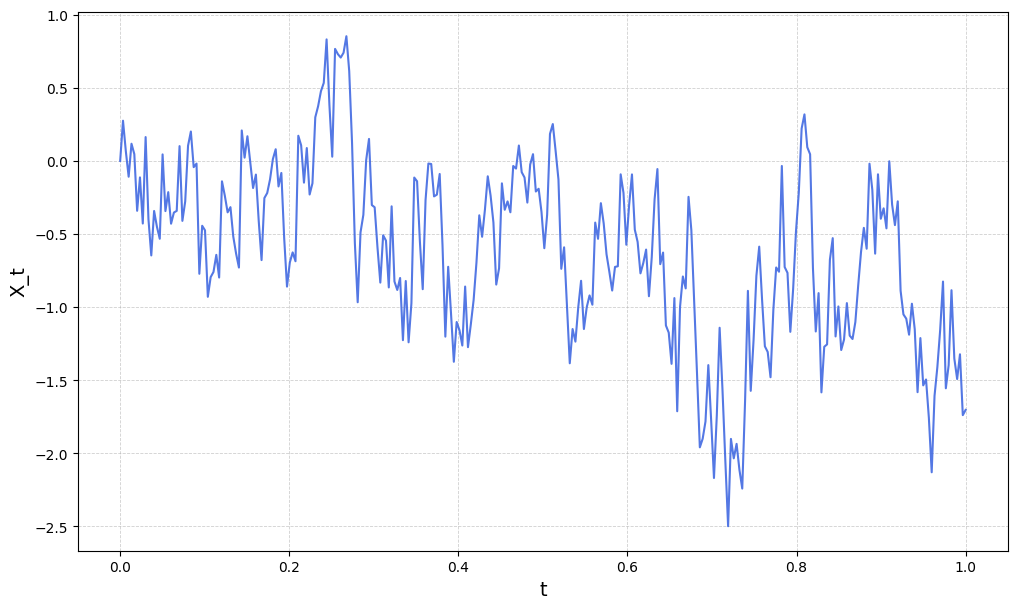

In [ ]:
def factor_euler_1(t, H, Z, n):
  r_ = r_val(n, H, 1.0)

  Y = np.zeros((n_step, n))
  for k in range(1, n):
    x_k = x(r_, H + 1/2, n, k)
    cst1 =  np.exp(- dt * x_k)
    cst2 = np.exp(-dt * x_k) *  np.sqrt(dt)
    for i in range(1, n_step):
      Y[i, k] = Y[i-1, k] * cst1 +  Z[i] * cst2

  X = np.zeros(n_step)
  for k in range(1, n):
    X = X + nu * c(r_, H + 1/2, n, k) * Y[:, k]

  return X


# test
plot_schema(factor_euler_1(t, 0.1, Z, 10))

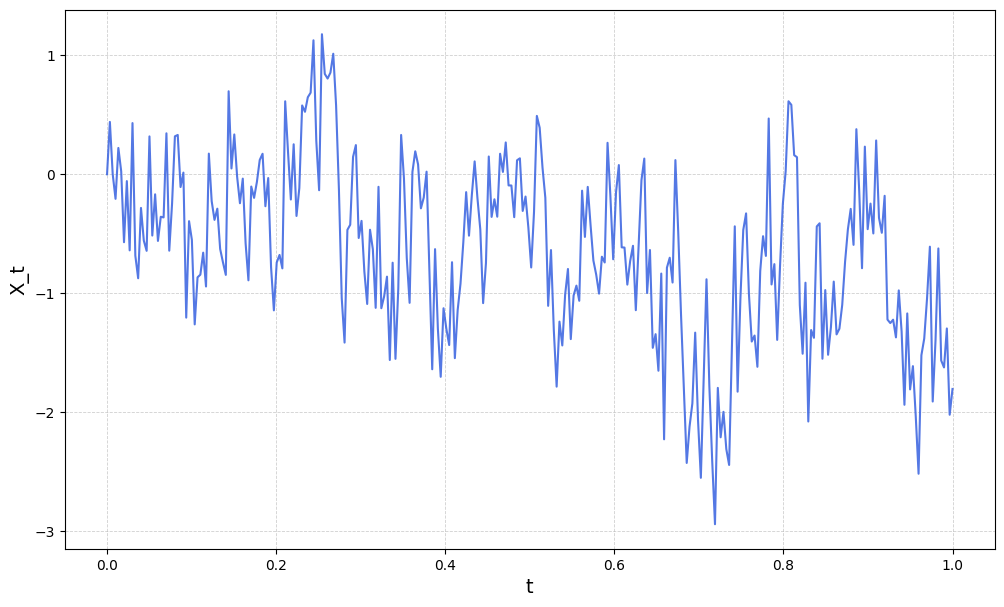

In [ ]:
def factor_euler_2(t, H, Z, n):
  r_ = r_val(n, H, 1.0)
  Y = np.zeros((n_step, n))
  for k in range(1, n):
    x_k = x(r_, H + 1/2, n, k)
    cst1 = (1/dt**(1/2)) * (1 - np.exp(-dt * x_k))/x_k
    cst2 = np.exp(- dt * x_k)
    for i in range(1, n_step):
      Y[i, k] = Y[i-1, k] * cst2 + Z[i] * cst1

  X = np.zeros(n_step)
  for k in range(1, n):
    X = X + nu * c(r_, H + 1/2, n, k) * Y[:, k]

  return X

# test
plot_schema(factor_euler_2(t, 0.1, Z, 10))

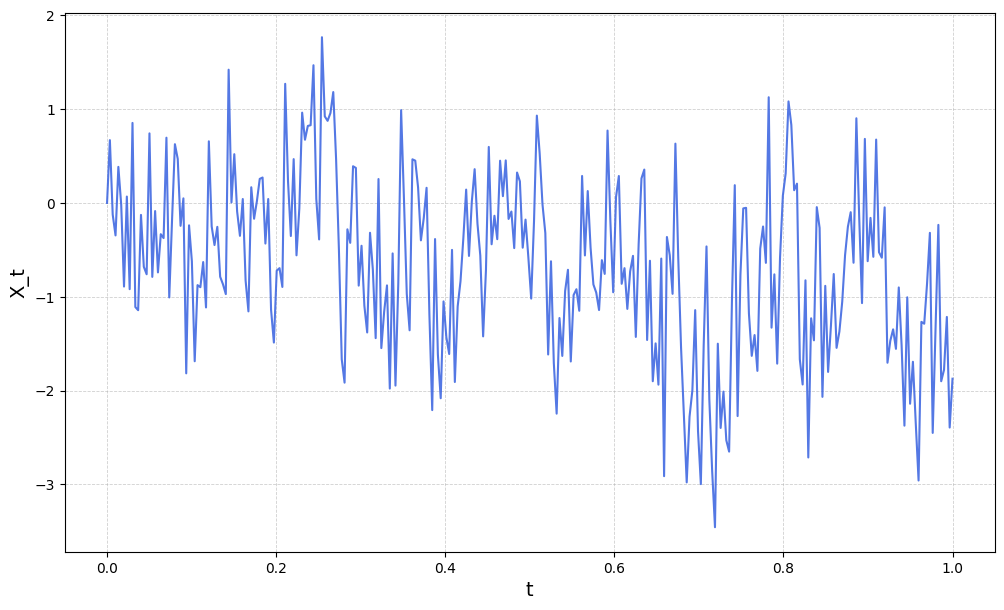

In [ ]:
def factor_euler_3(t, H, Z, n):
  r_ = r_val(n, H, 1.0)

  Y = np.zeros((n_step, n))
  for k in range(1, n):
    x_k = x(r_, H + 1/2, n, k)
    cst1 = np.exp(- dt * x_k)
    cst2 = ((1 - np.exp(-2 * dt * x_k))/(2 * x_k))**(1/2)
    for i in range(1, n_step):
      Y[i, k] = Y[i-1, k] * cst1 + Z[i] * cst2

  X = np.zeros(n_step)
  for k in range(1, n):
    X = X + nu * c(r_, H + 1/2, n, k) * Y[:, k]

  return X

# test
plot_schema(factor_euler_3(t, 0.1, Z, 10))

En appliquant ito à $Y^k$ on obtient
$dY^k = dW_t - x_kY_t^kdt$
et donc on peut considérer l'approximation $Y_{t_{i+1}}^k = \frac{1}{1 + x_kdt}((W_{t_{i+1}} - W_{t_{i}}) + Y_{t_i}^k)$

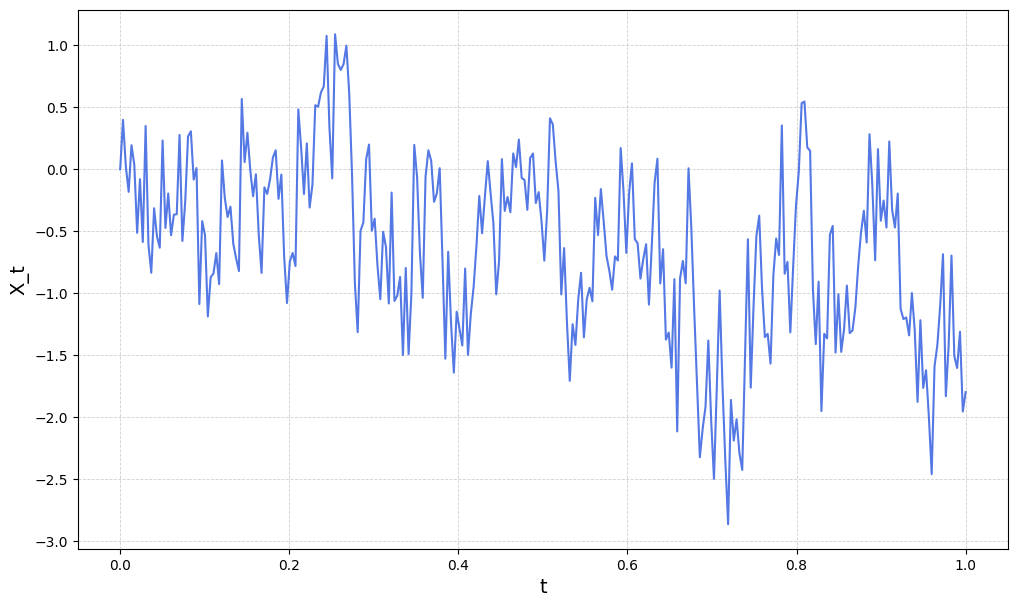

In [ ]:
def factor_euler_4(t, H, Z, n):
  r_ = r_val(n, H, 1.0)
  Y = np.zeros((n_step, n))
  for k in range(1, n):
    x_k = x(r_, H + 1/2, n, k)
    for i in range(1, n_step):
      Y[i, k] = (Y[i-1, k] + Z[i]*(dt)**(1/2))/(1 + x_k*dt)

  X = np.zeros(n_step)
  for k in range(1, n):
    X = X + nu * c(r_, H + 1/2, n, k) * Y[:, k]
  return X

# test
plot_schema(factor_euler_4(t, 0.1, Z, 10))

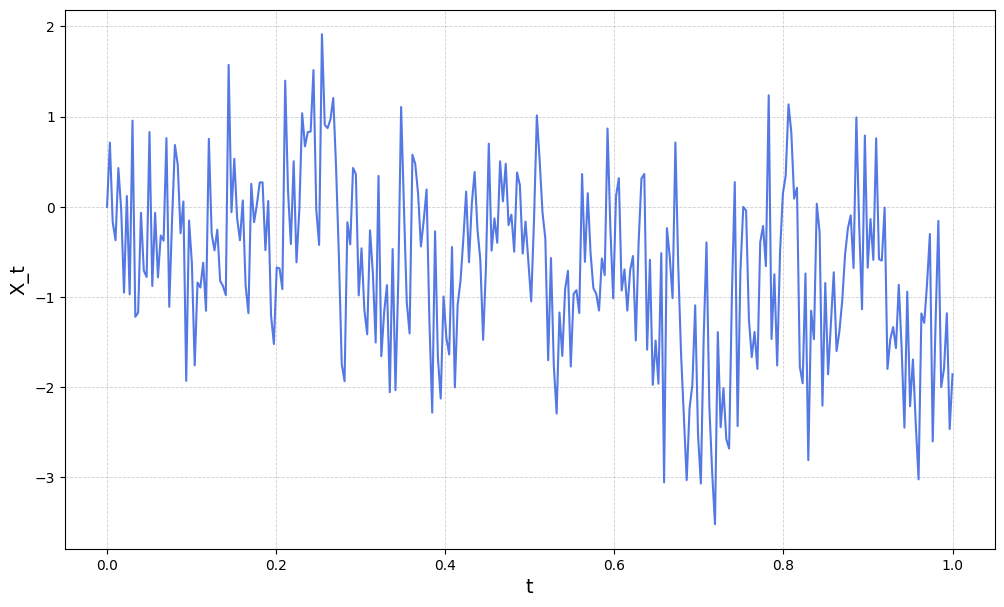

In [ ]:
def factor_euler_5(t, H, Z, n):
    r_ = r_val(n, H, 1.0)
    Y = np.zeros((n_step, n))

    for k in range(1, n):
        x_k = x(r_, H + 1/2, n, k)
        for i in range(1, n_step):
            Y[i, k] = (Y[i-1, k] + Z[i] * (dt)**(1/2)) / (1 + x_k * dt)

    X = np.zeros(n_step)
    mult = dt**(H) * (1 / gamma(H + 1/2)) / (2 * H)**(1/2)

    for k in range(1, n):
        x_k = x(r_, H + 1/2, n, k)
        c_k = c(r_, H + 1/2, n, k)
        m = nu * c_k * np.exp(-x_k * dt)
        for i in range(1, n_step):
            X[i] += m * Y[i-1, k]

    for i in range(1, n_step):
        X[i] += nu * mult * Z[i]
    return X



# test
plot_schema(factor_euler_5(t, 0.1, Z, 10))

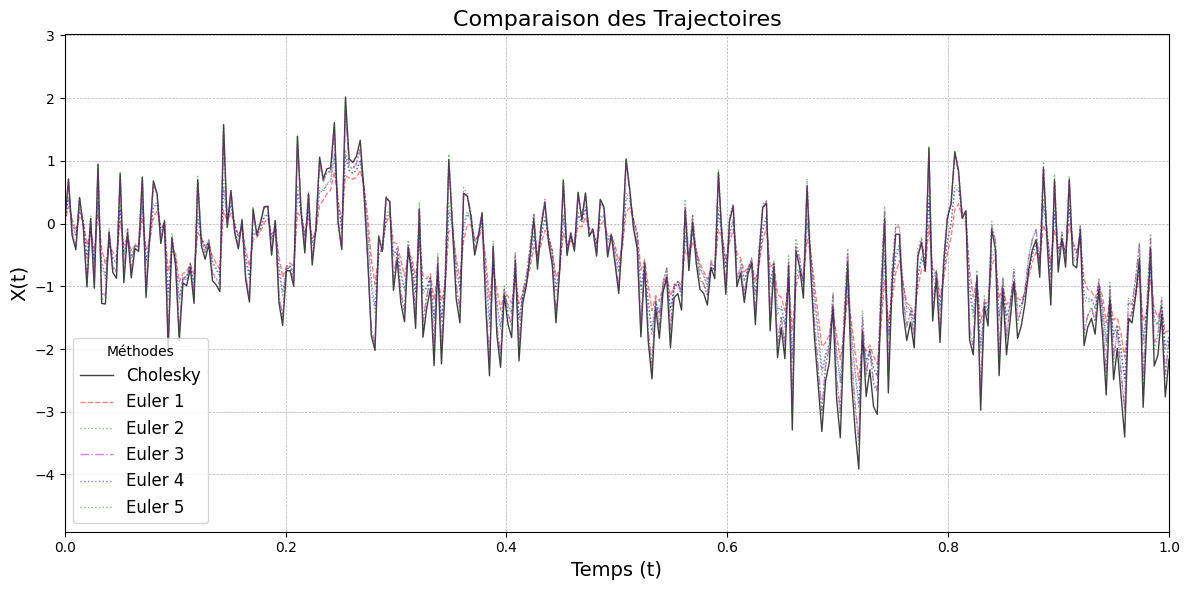

In [ ]:
X_chol = X_cholesky(t, 0.1, Z)
euler1 = factor_euler_1(t, 0.1, Z, 10)
euler2 = factor_euler_2(t, 0.1, Z, 10)
euler3 = factor_euler_3(t, 0.1, Z, 10)
euler4 = factor_euler_4(t, 0.1, Z, 10)
euler5 = factor_euler_5(t, 0.1, Z, 10)

plt.figure(figsize=(12, 6))

plt.plot(t, X_chol, label='Cholesky', color='black', linestyle='-', linewidth=1, alpha = 0.75)
plt.plot(t, euler1, label='Euler 1', color='r', linestyle='--', linewidth=1, alpha = 0.5)
plt.plot(t, euler2, label='Euler 2', color='g', linestyle=':', linewidth=1, alpha = 0.5)
plt.plot(t, euler3, label='Euler 3', color='m', linestyle='-.', linewidth=1, alpha = 0.5)
plt.plot(t, euler4, label='Euler 4', color='b', linestyle=':', linewidth=1, alpha = 0.5)
plt.plot(t, euler5, label='Euler 5', color='g', linestyle=':', linewidth=1, alpha = 0.5)

plt.title('Comparaison des Trajectoires', fontsize=16)
plt.xlabel('Temps (t)', fontsize=14)
plt.ylabel('X(t)', fontsize=14)
plt.legend(title='Méthodes', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xlim(t[0], t[-1])
plt.ylim(np.min([X_chol, euler1, euler2, euler3, euler4, euler5]) - 1, np.max([X_chol, euler1, euler2, euler3, euler4, euler5]) + 1)

plt.tight_layout()
plt.show()

In [ ]:
%timeit factor_euler_1(t, 0.1, Z, 4)
%timeit factor_euler_2(t, 0.1, Z, 4)
%timeit factor_euler_3(t, 0.1, Z, 4)
%timeit factor_euler_4(t, 0.1, Z, 4)
%timeit factor_euler_5(t, 0.1, Z, 4)

12.6 ms ± 3.27 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.6 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.3 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.5 ms ± 584 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
13.1 ms ± 3.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit factor_euler_1(t, 0.1, Z, 10)
%timeit factor_euler_2(t, 0.1, Z, 10)
%timeit factor_euler_3(t, 0.1, Z, 10)
%timeit factor_euler_4(t, 0.1, Z, 10)
%timeit factor_euler_5(t, 0.1, Z, 10)

31.7 ms ± 706 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
31.1 ms ± 537 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
32 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
41.6 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
40.3 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit factor_euler_1(t, 0.1, Z, 20)
%timeit factor_euler_2(t, 0.1, Z, 20)
%timeit factor_euler_3(t, 0.1, Z, 20)
%timeit factor_euler_4(t, 0.1, Z, 20)
%timeit factor_euler_5(t, 0.1, Z, 20)

88.9 ms ± 568 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
112 ms ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
106 ms ± 28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
90.2 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
115 ms ± 33.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Comparaison des RMSE

In [ ]:
def comparaison1(M, H, n, print_ = True):
  MSE_euler_1 = 0
  MSE_euler_2 = 0
  MSE_euler_3 = 0
  MSE_euler_4 = 0
  MSE_euler_5 = 0
  for i in range(M):
    Z = np.random.normal(0, 1 , n_step)
    X = X_cholesky(t, H, Z)
    X_euler_1 = factor_euler_1(t, H, Z, n)
    X_euler_2 = factor_euler_2(t, H, Z, n)
    X_euler_3 = factor_euler_3(t, H, Z, n)
    X_euler_4 = factor_euler_4(t, H, Z, n)
    X_euler_5 = factor_euler_5(t, H, Z, n)
    dX_euler_1 = X - X_euler_1
    dX_euler_2 = X - X_euler_2
    dX_euler_3 = X - X_euler_3
    dX_euler_4 = X - X_euler_4
    dX_euler_5 = X - X_euler_5
    MSE_euler_1 += np.mean(dX_euler_1**2)**(1/2)
    MSE_euler_2 += np.mean(dX_euler_2**2)**(1/2)
    MSE_euler_3 += np.mean(dX_euler_3**2)**(1/2)
    MSE_euler_4 += np.mean(dX_euler_4**2)**(1/2)
    MSE_euler_5 += np.mean(dX_euler_5**2)**(1/2)

  if print_ == True:
    print("Avec H = " + str(H))
    print("MSE pour factor_euler_1 : " + str(MSE_euler_1/M))
    print("MSE pour factor_euler_2 : " + str(MSE_euler_2/M))
    print("MSE pour factor_euler_3 : " + str(MSE_euler_3/M))
    print("MSE pour factor_euler_4 : " + str(MSE_euler_4/M))
    print("MSE pour factor_euler_5 : " + str(MSE_euler_5/M))
    print()

  return MSE_euler_1/M, MSE_euler_2/M, MSE_euler_3/M, MSE_euler_4/M, MSE_euler_5/M

comparaison1(20, 0.01, 10)
comparaison1(20, 0.1, 10)
comparaison1(20, 0.4, 10)
print()

Avec H = 0.01
MSE pour factor_euler_1 : 3.456926214261665
MSE pour factor_euler_2 : 3.2413319520325907
MSE pour factor_euler_3 : 1.4822183367877866
MSE pour factor_euler_4 : 3.3398452724221572
MSE pour factor_euler_5 : 0.4329499183383433

Avec H = 0.1
MSE pour factor_euler_1 : 0.5776336243205346
MSE pour factor_euler_2 : 0.3808500586967192
MSE pour factor_euler_3 : 0.14723454867129213
MSE pour factor_euler_4 : 0.4261773529763505
MSE pour factor_euler_5 : 0.12506995454554629

Avec H = 0.4
MSE pour factor_euler_1 : 0.10668217852131326
MSE pour factor_euler_2 : 0.10344665696842689
MSE pour factor_euler_3 : 0.10257945645843776
MSE pour factor_euler_4 : 0.10367121364923175
MSE pour factor_euler_5 : 0.10257696727062333




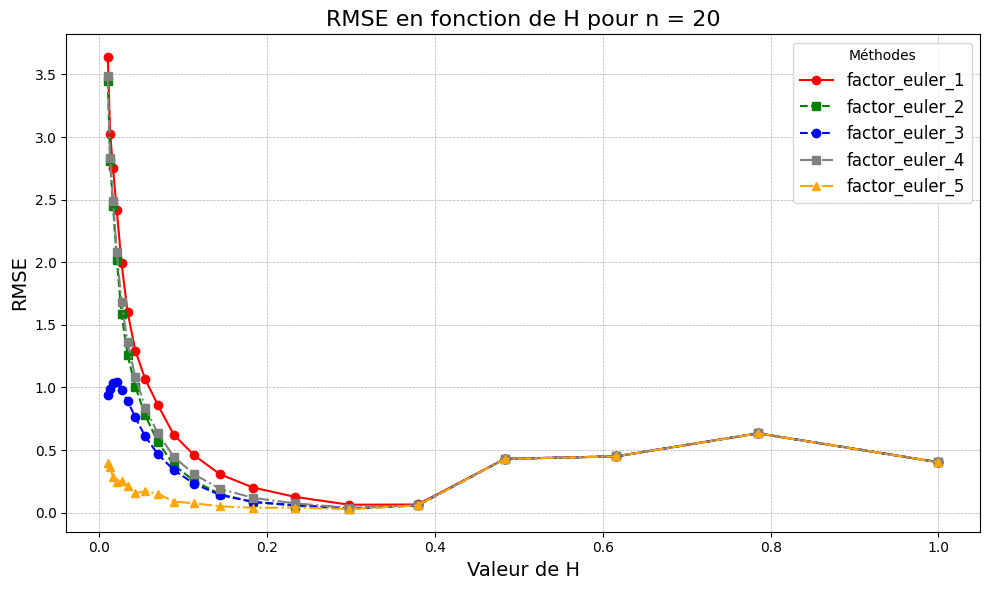

In [ ]:
M = 5
n = 20

H_values = np.logspace(-2, 0, 20)

MSE_euler_1_list = []
MSE_euler_2_list = []
MSE_euler_3_list = []
MSE_euler_4_list = []
MSE_euler_5_list = []


for H in H_values:
    MSE_euler_1, MSE_euler_2, MSE_euler_3, MSE_euler_4, MSE_euler_5 = comparaison1(M, H, n, print_=False)
    MSE_euler_1_list.append(MSE_euler_1)
    MSE_euler_2_list.append(MSE_euler_2)
    MSE_euler_3_list.append(MSE_euler_3)
    MSE_euler_4_list.append(MSE_euler_4)
    MSE_euler_5_list.append(MSE_euler_5)

plt.figure(figsize=(10, 6))

plt.plot(H_values, MSE_euler_1_list, label="factor_euler_1", marker='o', linestyle='-', color='r')
plt.plot(H_values, MSE_euler_2_list, label="factor_euler_2", marker='s', linestyle='--', color='g')
plt.plot(H_values, MSE_euler_3_list, label="factor_euler_3", marker='o', linestyle='--', color='b')
plt.plot(H_values, MSE_euler_4_list, label="factor_euler_4", marker='s', linestyle='-.', color='grey')
plt.plot(H_values, MSE_euler_5_list, label="factor_euler_5", marker='^', linestyle='-.', color='orange')

plt.title("RMSE en fonction de H pour n = " + str(n), fontsize=16)
plt.xlabel("Valeur de H", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.legend(title="Méthodes", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

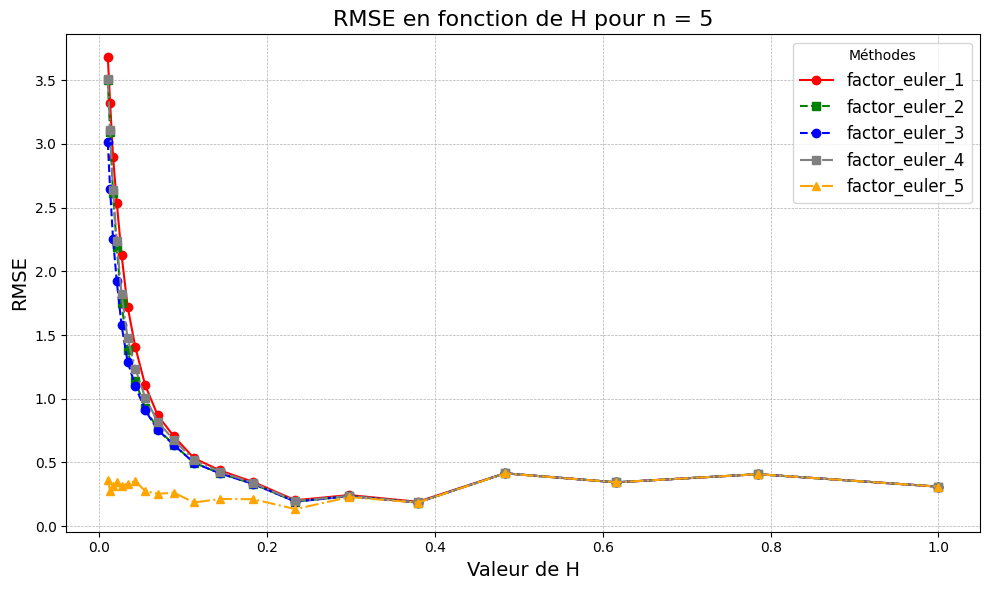

In [ ]:
M = 5
n = 5

H_values = np.logspace(-2, 0, 20)

MSE_euler_1_list = []
MSE_euler_2_list = []
MSE_euler_3_list = []
MSE_euler_4_list = []
MSE_euler_5_list = []


for H in H_values:
    MSE_euler_1, MSE_euler_2, MSE_euler_3, MSE_euler_4, MSE_euler_5 = comparaison1(M, H, n, print_=False)
    MSE_euler_1_list.append(MSE_euler_1)
    MSE_euler_2_list.append(MSE_euler_2)
    MSE_euler_3_list.append(MSE_euler_3)
    MSE_euler_4_list.append(MSE_euler_4)
    MSE_euler_5_list.append(MSE_euler_5)

plt.figure(figsize=(10, 6))

plt.plot(H_values, MSE_euler_1_list, label="factor_euler_1", marker='o', linestyle='-', color='r')
plt.plot(H_values, MSE_euler_2_list, label="factor_euler_2", marker='s', linestyle='--', color='g')
plt.plot(H_values, MSE_euler_3_list, label="factor_euler_3", marker='o', linestyle='--', color='b')
plt.plot(H_values, MSE_euler_4_list, label="factor_euler_4", marker='s', linestyle='-.', color='grey')
plt.plot(H_values, MSE_euler_5_list, label="factor_euler_5", marker='^', linestyle='-.', color='orange')

plt.title("RMSE en fonction de H pour n = " + str(n), fontsize=16)
plt.xlabel("Valeur de H", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.legend(title="Méthodes", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

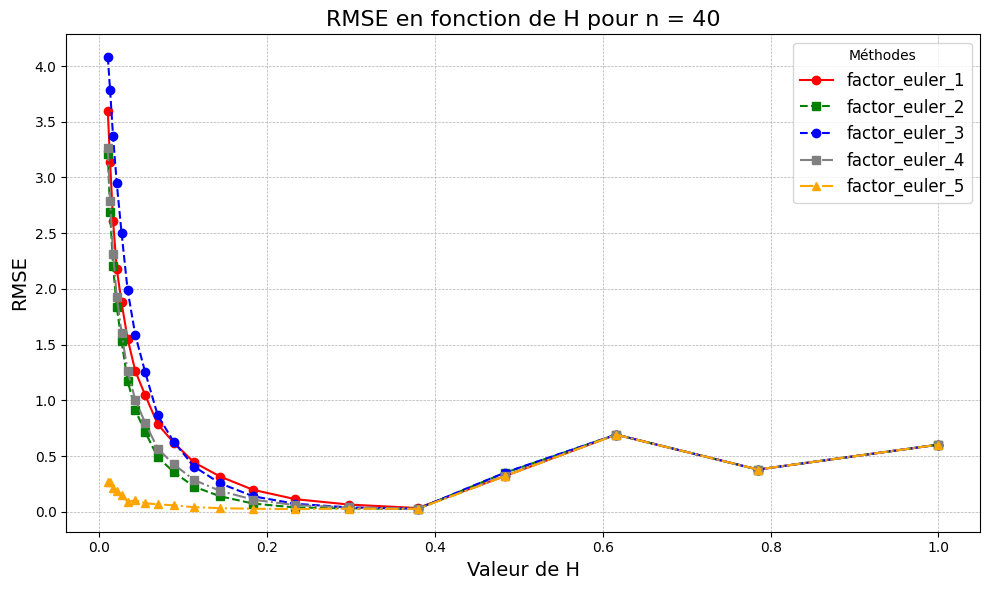

In [ ]:
M = 5
n = 40

H_values = np.logspace(-2, 0, 20)

MSE_euler_1_list = []
MSE_euler_2_list = []
MSE_euler_3_list = []
MSE_euler_4_list = []
MSE_euler_5_list = []


for H in H_values:
    MSE_euler_1, MSE_euler_2, MSE_euler_3, MSE_euler_4, MSE_euler_5 = comparaison1(M, H, n, print_=False)
    MSE_euler_1_list.append(MSE_euler_1)
    MSE_euler_2_list.append(MSE_euler_2)
    MSE_euler_3_list.append(MSE_euler_3)
    MSE_euler_4_list.append(MSE_euler_4)
    MSE_euler_5_list.append(MSE_euler_5)

plt.figure(figsize=(10, 6))

plt.plot(H_values, MSE_euler_1_list, label="factor_euler_1", marker='o', linestyle='-', color='r')
plt.plot(H_values, MSE_euler_2_list, label="factor_euler_2", marker='s', linestyle='--', color='g')
plt.plot(H_values, MSE_euler_3_list, label="factor_euler_3", marker='o', linestyle='--', color='b')
plt.plot(H_values, MSE_euler_4_list, label="factor_euler_4", marker='s', linestyle='-.', color='grey')
plt.plot(H_values, MSE_euler_5_list, label="factor_euler_5", marker='^', linestyle='-.', color='orange')

plt.title("RMSE en fonction de H pour n = " + str(n), fontsize=16)
plt.xlabel("Valeur de H", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.legend(title="Méthodes", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

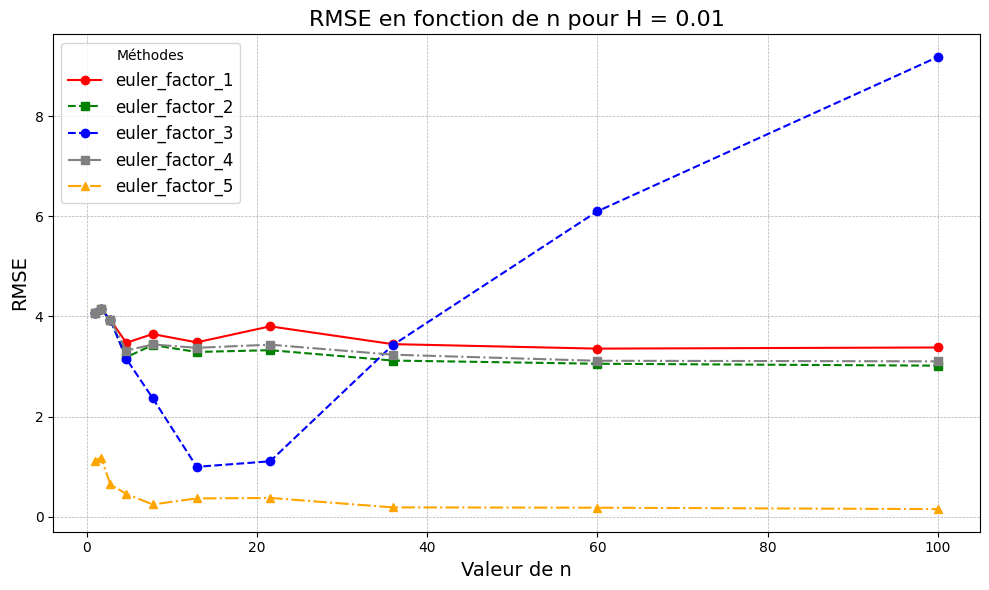

In [ ]:
M = 3
H = 0.01

n_values = np.logspace(0, 2, 10)

MSE_euler_1_list = []
MSE_euler_2_list = []
MSE_euler_3_list = []
MSE_euler_4_list = []
MSE_euler_5_list = []


for n in n_values:
    MSE_euler_1, MSE_euler_2, MSE_euler_3, MSE_euler_4, MSE_euler_5 = comparaison1(M, H, int(n), print_=False)
    MSE_euler_1_list.append(MSE_euler_1)
    MSE_euler_2_list.append(MSE_euler_2)
    MSE_euler_3_list.append(MSE_euler_3)
    MSE_euler_4_list.append(MSE_euler_4)
    MSE_euler_5_list.append(MSE_euler_5)

plt.figure(figsize=(10, 6))

plt.plot(n_values, MSE_euler_1_list, label="euler_factor_1", marker='o', linestyle='-', color='r')
plt.plot(n_values, MSE_euler_2_list, label="euler_factor_2", marker='s', linestyle='--', color='g')
plt.plot(n_values, MSE_euler_3_list, label="euler_factor_3", marker='o', linestyle='--', color='b')
plt.plot(n_values, MSE_euler_4_list, label="euler_factor_4", marker='s', linestyle='-.', color='grey')
plt.plot(n_values, MSE_euler_5_list, label="euler_factor_5", marker='^', linestyle='-.', color='orange')

plt.title("RMSE en fonction de n pour H = " + str(H), fontsize=16)
plt.xlabel("Valeur de n", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.legend(title="Méthodes", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

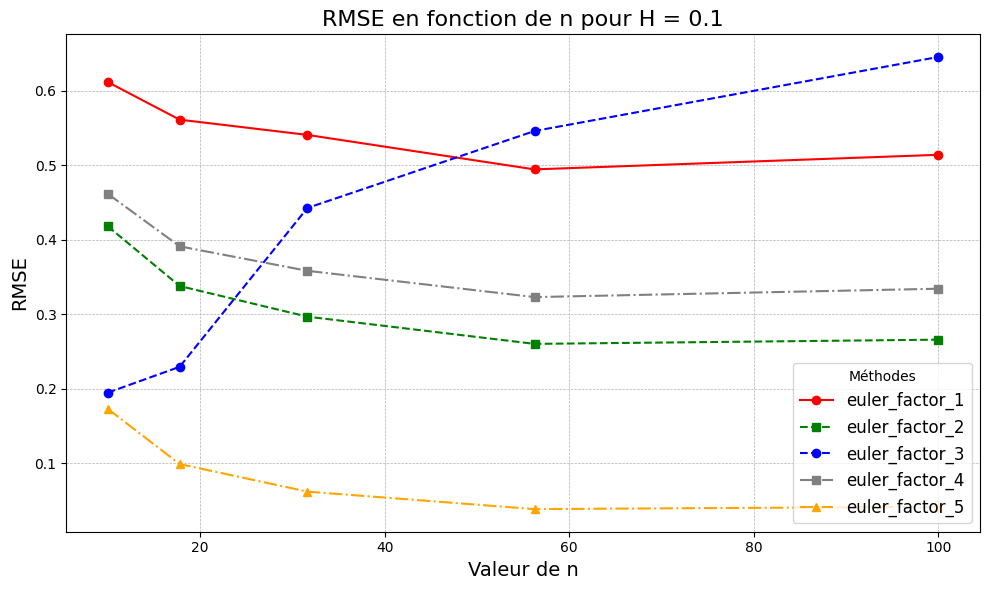

In [ ]:
M = 3
H = 0.1

n_values = np.logspace(1, 2, 5)

MSE_euler_1_list = []
MSE_euler_2_list = []
MSE_euler_3_list = []
MSE_euler_4_list = []
MSE_euler_5_list = []


for n in n_values:
    MSE_euler_1, MSE_euler_2, MSE_euler_3, MSE_euler_4, MSE_euler_5 = comparaison1(M, H, int(n), print_=False)
    MSE_euler_1_list.append(MSE_euler_1)
    MSE_euler_2_list.append(MSE_euler_2)
    MSE_euler_3_list.append(MSE_euler_3)
    MSE_euler_4_list.append(MSE_euler_4)
    MSE_euler_5_list.append(MSE_euler_5)

plt.figure(figsize=(10, 6))

plt.plot(n_values, MSE_euler_1_list, label="euler_factor_1", marker='o', linestyle='-', color='r')
plt.plot(n_values, MSE_euler_2_list, label="euler_factor_2", marker='s', linestyle='--', color='g')
plt.plot(n_values, MSE_euler_3_list, label="euler_factor_3", marker='o', linestyle='--', color='b')
plt.plot(n_values, MSE_euler_4_list, label="euler_factor_4", marker='s', linestyle='-.', color='grey')
plt.plot(n_values, MSE_euler_5_list, label="euler_factor_5", marker='^', linestyle='-.', color='orange')

plt.title("RMSE en fonction de n pour H = " + str(H), fontsize=16)
plt.xlabel("Valeur de n", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.legend(title="Méthodes", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

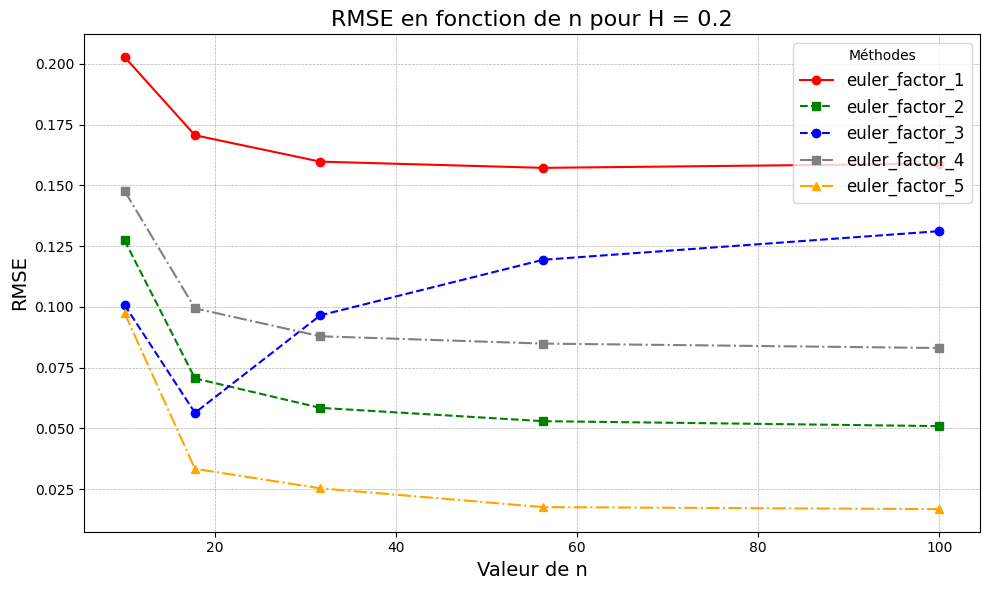

In [ ]:
M = 3
H = 0.2

n_values = np.logspace(1, 2, 5)

MSE_euler_1_list = []
MSE_euler_2_list = []
MSE_euler_3_list = []
MSE_euler_4_list = []
MSE_euler_5_list = []


for n in n_values:
    MSE_euler_1, MSE_euler_2, MSE_euler_3, MSE_euler_4, MSE_euler_5 = comparaison1(M, H, int(n), print_=False)
    MSE_euler_1_list.append(MSE_euler_1)
    MSE_euler_2_list.append(MSE_euler_2)
    MSE_euler_3_list.append(MSE_euler_3)
    MSE_euler_4_list.append(MSE_euler_4)
    MSE_euler_5_list.append(MSE_euler_5)

plt.figure(figsize=(10, 6))

plt.plot(n_values, MSE_euler_1_list, label="euler_factor_1", marker='o', linestyle='-', color='r')
plt.plot(n_values, MSE_euler_2_list, label="euler_factor_2", marker='s', linestyle='--', color='g')
plt.plot(n_values, MSE_euler_3_list, label="euler_factor_3", marker='o', linestyle='--', color='b')
plt.plot(n_values, MSE_euler_4_list, label="euler_factor_4", marker='s', linestyle='-.', color='grey')
plt.plot(n_values, MSE_euler_5_list, label="euler_factor_5", marker='^', linestyle='-.', color='orange')

plt.title("RMSE en fonction de n pour H = " + str(H), fontsize=16)
plt.xlabel("Valeur de n", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.legend(title="Méthodes", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
from matplotlib.colors import LogNorm

M = 1

H_values = np.linspace(0.01, 0.45, 10)
n_values = np.linspace(2, 40, 10)
methods_names = ["euler_factor_1", "euler_factor_2", "euler_factor_3", "euler_factor_4", "euler_factor_5"]

MSE_matrices = {name: np.zeros((len(H_values), len(n_values))) for name in methods_names}

for i, H in enumerate(H_values):
    for j, n in enumerate(n_values):
        MSE_euler_1, MSE_euler_2, MSE_euler_3, MSE_euler_4, MSE_euler_5 = comparaison1(M, H, int(n), print_=False)
        MSE_matrices["euler_factor_1"][i, j] = MSE_euler_1
        MSE_matrices["euler_factor_2"][i, j] = MSE_euler_2
        MSE_matrices["euler_factor_3"][i, j] = MSE_euler_3
        MSE_matrices["euler_factor_4"][i, j] = MSE_euler_4
        MSE_matrices["euler_factor_5"][i, j] = MSE_euler_5

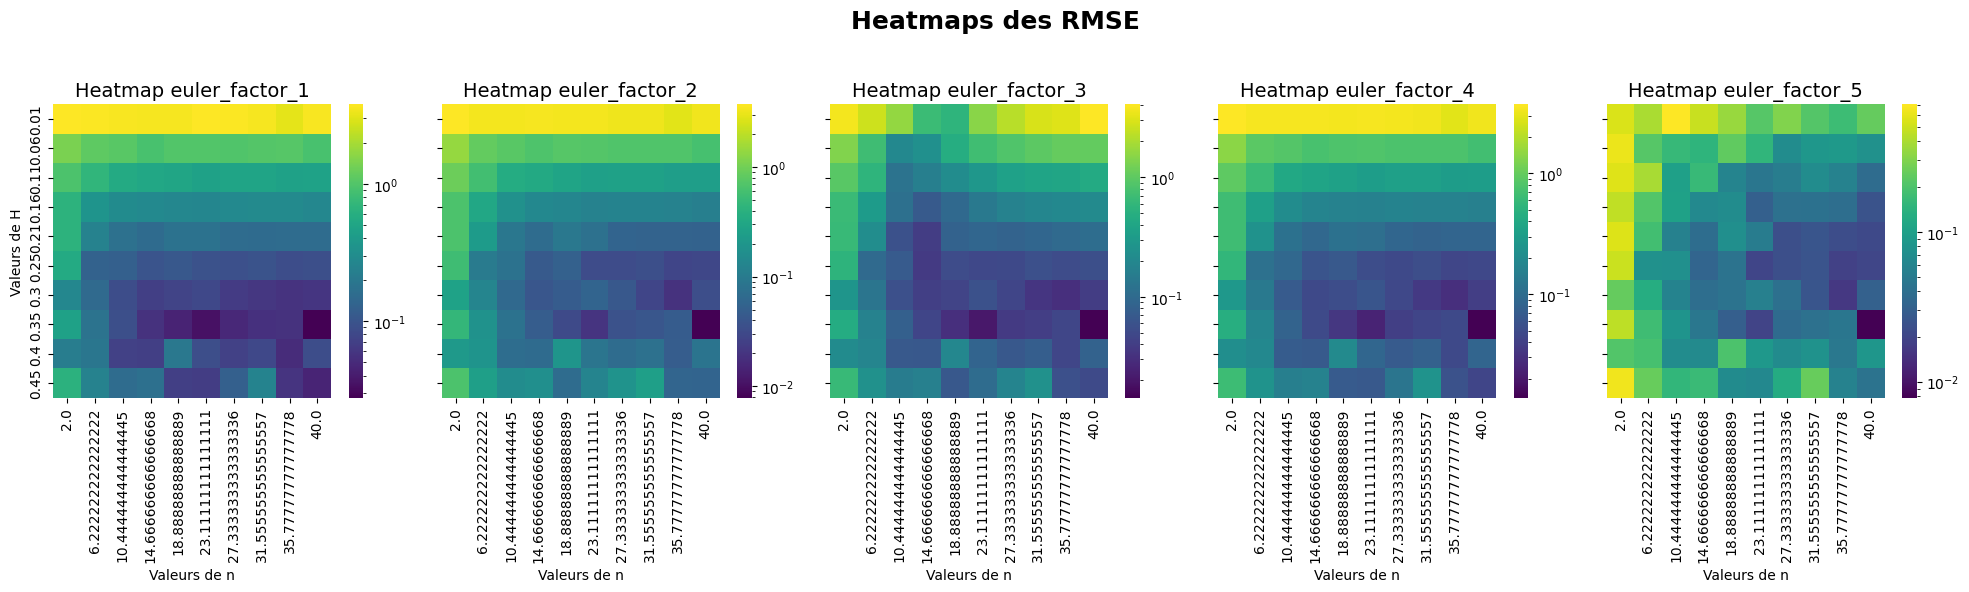

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

for idx, method in enumerate(methods_names):
    sns.heatmap(
        MSE_matrices[method],
        ax=axes[idx],
        cmap='viridis',
        norm=LogNorm(vmin=np.min(MSE_matrices[method][MSE_matrices[method] > 0]),
                     vmax=np.max(MSE_matrices[method])),
        xticklabels=n_values,
        yticklabels=np.round(H_values, 2),
        cbar=True
    )
    axes[idx].set_title(f"Heatmap {method}", fontsize=14)
    axes[idx].set_xlabel("Valeurs de n")
    if idx == 0:
        axes[idx].set_ylabel("Valeurs de H")

plt.suptitle("Heatmaps des RMSE", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">4. Going beyond</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Simulation is not a one-size-fits-all solution. Break free from the mold and discover new methods to solve the problem at hand. </strong></p>


Explain how the above method can be adapted to the shifted kernel  
$$ K_{\epsilon}(t,s) = \frac{1}{\Gamma(H + 1/2)} (\epsilon + t - s)^{H-1/2} 1_{s<t}$$

Notice that now $H\in (-\infty, \infty)$. Why?

Study the impact of $\epsilon>0$ on the schemes. You can make epsilon vary between  $0$ and $1/52$, also for $\epsilon>0$ you can test with $H$ varying between $-1$ and $0.5$

$$X_t = X_0 + \int_0^t K_{\epsilon}(t, s)dW_s $$

Comme $(\epsilon + t - s)1_{s < t} > 0$, on peut prendre H dans R


On reprend le raisonnement précédent et on cherche à retrouver les $c_i^n$ et $x_i^n$ associés à $K_{\epsilon}$.

On peut écrire, pour t > 0
$$\begin{align}
K_{\epsilon}(t) &= \frac{1}{\Gamma(H + 1/2)} (\epsilon + t)^{H - 1/2} \\ &=  \int_{0}^{\infty} \exp(-\theta(t + \epsilon))\frac{\theta^{-H-1/2}}{\Gamma(H+1/2)\Gamma(-H + 1/2)}d\theta \\ &= \int_{0}^{\infty} \exp(-\theta t)(\frac{\exp(-\theta\epsilon)\theta^{-H-1/2}}{\Gamma(H+1/2)\Gamma(- H+1/2)}d\theta) \\ &= \int_{0}^{\infty} \exp(-\theta t)\mu(d\theta) \end{align}$$

avec $\mu(d\theta) = \frac{\exp(-\theta\epsilon)\theta^{-H-1/2}}{\Gamma(-H+1/2)\Gamma(H + 1/2)}d\theta$

On a alors

$$c_i^n = \int_{\eta_{i-1}}^{\eta_i} d\mu(x)$$

et

$$x_i^n = (1/c_i^n) \int_{\eta_{i-1}}^{\eta_i} x d\mu(x)$$

On garde les mêmes r que précédement.

### Effet de Epsilon sur le schema.

On commence par experimenter avec factor_euler_1 (modifié) et on regarde comment epsilon modifie une trajectoire.

In [ ]:
def c2(r_n, alpha0, n, i, eps):
    H = alpha0 - 0.5
    x_i = r_n ** (i - n / 2)
    x_prev = r_n ** (i - 1 - n / 2)

    def integrand(theta):
        return np.exp(- theta * eps +  np.log(theta) * (- H - 0.5))

    result, _ = quad(integrand, x_prev, x_i)
    return result / (gamma(H + 0.5) * gamma(0.5 - H))


def x2(r_n, alpha0, n, i, eps):
    H = alpha0 - 0.5
    x_i = r_n ** (i - n / 2)
    x_prev = r_n ** (i - 1 - n / 2)
    c2_val = c2(r_n, alpha0, n, i, eps)
    cst = c2_val * (gamma(H + 0.5) * gamma(0.5 - H))
    def integrand(theta):
        return np.exp(- theta * eps + np.log(theta) * (- H + 0.5)) / cst

    result, _ = quad(integrand, x_prev, x_i)
    return result


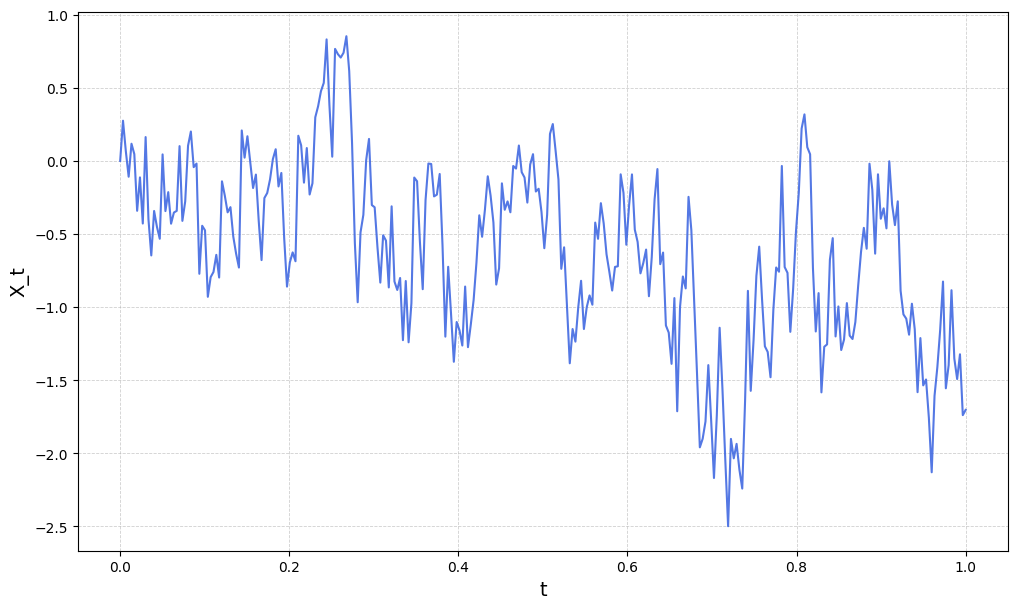

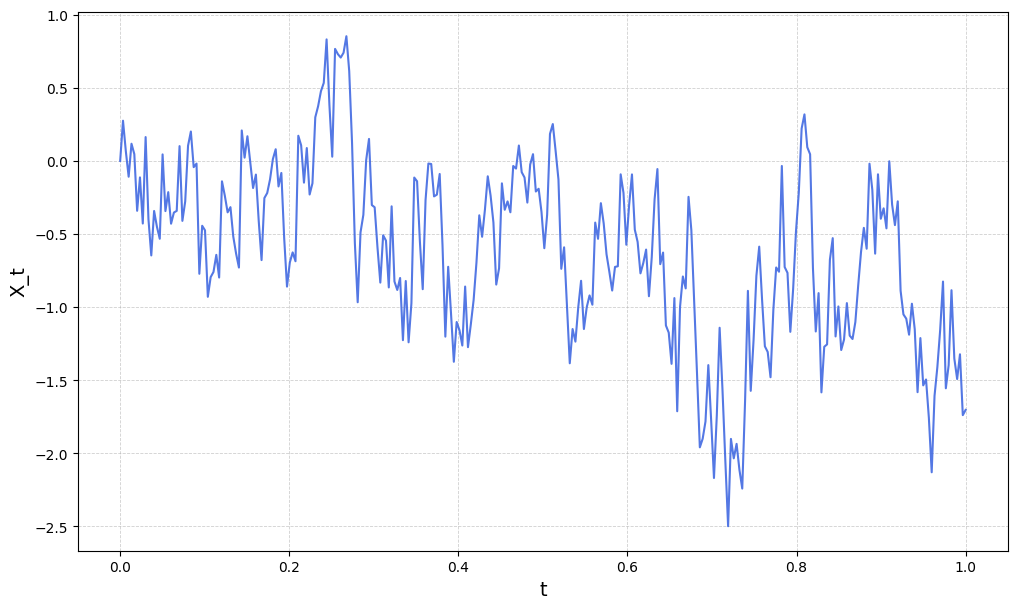

In [ ]:
def factor_euler_1_m(t, H, Z, n, eps):
  r_ = r_val(n, H, 1.0)
  Y = np.zeros((n_step, n))
  for k in range(1, n):
    x_k = x2(r_, H + 1/2, n, k, eps)
    cst1 =  np.exp(- dt * x_k)
    cst2 = np.exp(- dt * x_k) * np.sqrt(dt)
    for i in range(1, n_step):
      Y[i, k] = Y[i-1, k] * cst1 +  Z[i] * cst2
  X = np.zeros(n_step)
  for k in range(1, n):
    X = X + nu * c2(r_, H + 1/2, n, k, eps) * Y[:, k]
  return X


# on test la fonction est on vérifie qu'elle donne la même résultat que factor_euler_1 quand eps est 0. (ce qui est le cas)
plot_schema(factor_euler_1(t, 0.1, Z, 10))
plot_schema(factor_euler_1_m(t, 0.1, Z, 10, 0))

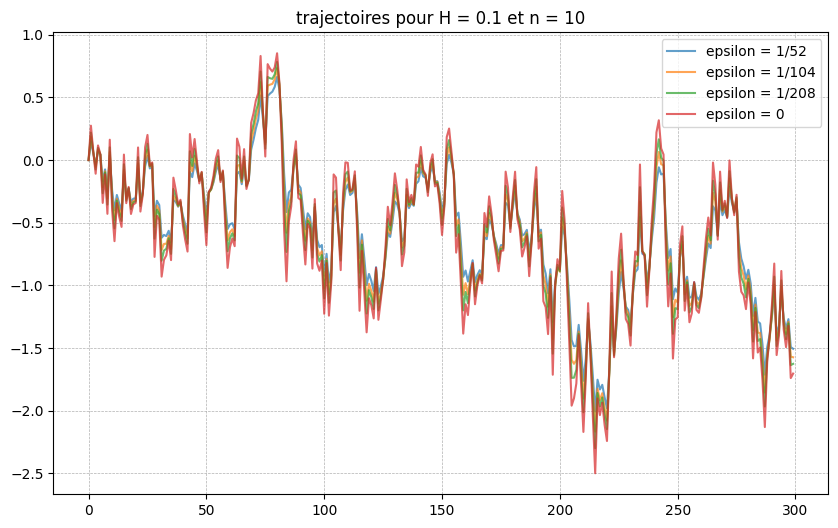

In [ ]:
# test
plt.figure(figsize=(10, 6))
plt.title("trajectoires pour H = 0.1 et n = 10")
plt.plot(factor_euler_1_m(t, 0.1, Z, 10, 1/52), alpha=0.7, label="epsilon = 1/52")
plt.plot(factor_euler_1_m(t, 0.1, Z, 10, 1/104), alpha=0.7, label="epsilon = 1/104")
plt.plot(factor_euler_1_m(t, 0.1, Z, 10, 1/208), alpha=0.7, label="epsilon = 1/208")
plt.plot(factor_euler_1(t, 0.1, Z, 10), alpha=0.7, label="epsilon = 0")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

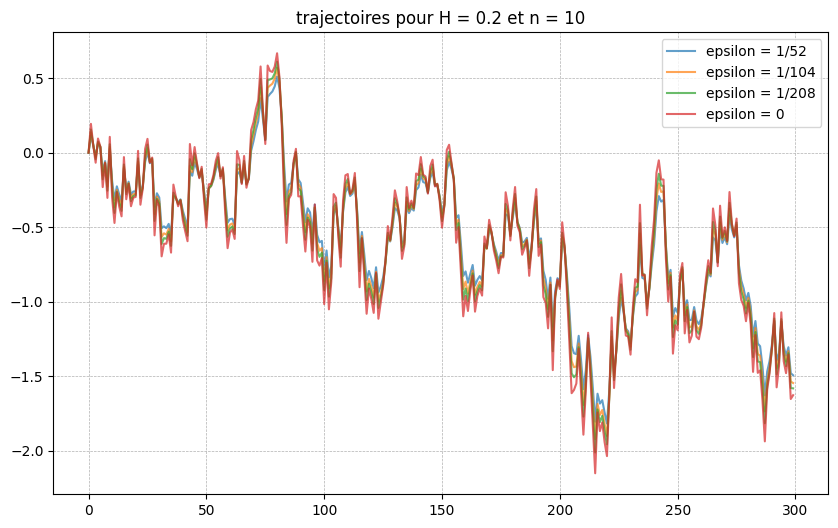

In [ ]:
# test
plt.figure(figsize=(10, 6))
plt.title("trajectoires pour H = 0.2 et n = 10")
plt.plot(factor_euler_1_m(t, 0.2, Z, 10, 1/52), alpha=0.7, label="epsilon = 1/52")
plt.plot(factor_euler_1_m(t, 0.2, Z, 10, 1/104), alpha=0.7, label="epsilon = 1/104")
plt.plot(factor_euler_1_m(t, 0.2, Z, 10, 1/208), alpha=0.7, label="epsilon = 1/208")
plt.plot(factor_euler_1_m(t, 0.2, Z, 10, 0), alpha=0.7, label="epsilon = 0")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

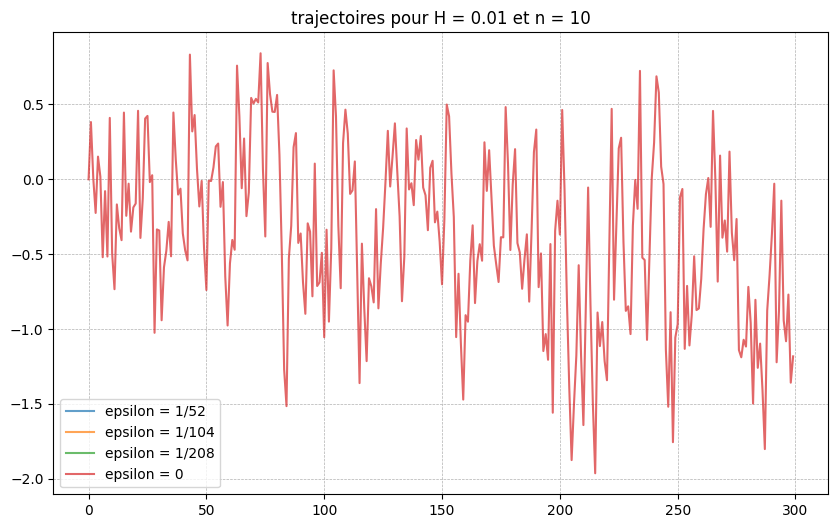

In [ ]:
# test
plt.figure(figsize=(10, 6))
plt.title("trajectoires pour H = 0.01 et n = 10")
plt.plot(factor_euler_1_m(t, 0.01, Z, 10, 1/52), alpha=0.7, label="epsilon = 1/52")
plt.plot(factor_euler_1_m(t, 0.01, Z, 10, 1/104), alpha=0.7, label="epsilon = 1/104")
plt.plot(factor_euler_1_m(t, 0.01, Z, 10, 1/208), alpha=0.7, label="epsilon = 1/208")
plt.plot(factor_euler_1_m(t, 0.01, Z, 10, 0), alpha=0.7, label="epsilon = 0")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

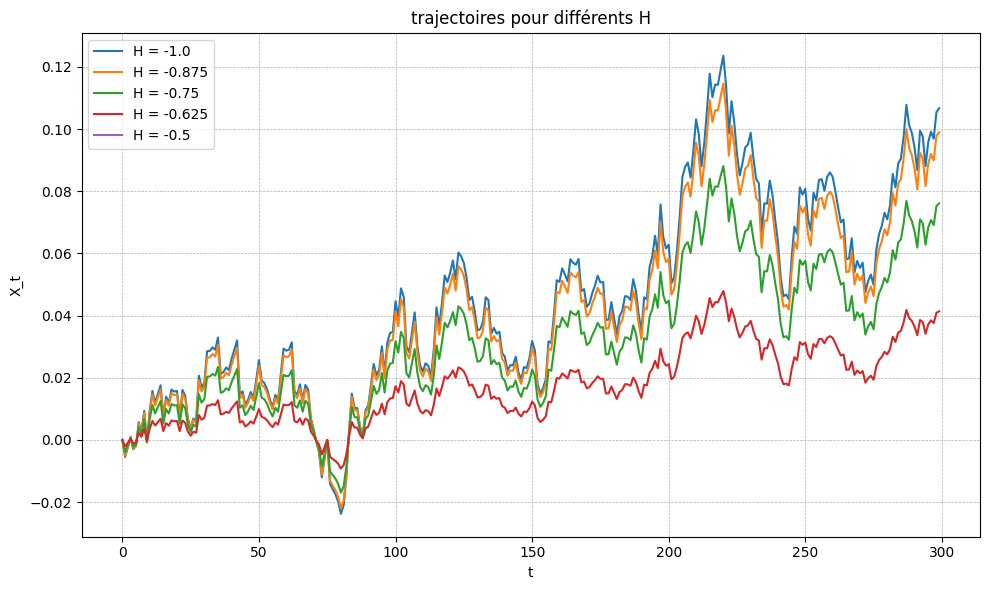

In [ ]:
plt.figure(figsize=(10, 6))

H_values = np.linspace(-1, -0.5, 5)

for h in H_values:
    plt.plot(
        factor_euler_1_m(t, h, Z, 5, 1 / 104),
        label=f'H = {h}'
    )

plt.title("trajectoires pour différents H")
plt.xlabel("t")
plt.ylabel("X_t")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

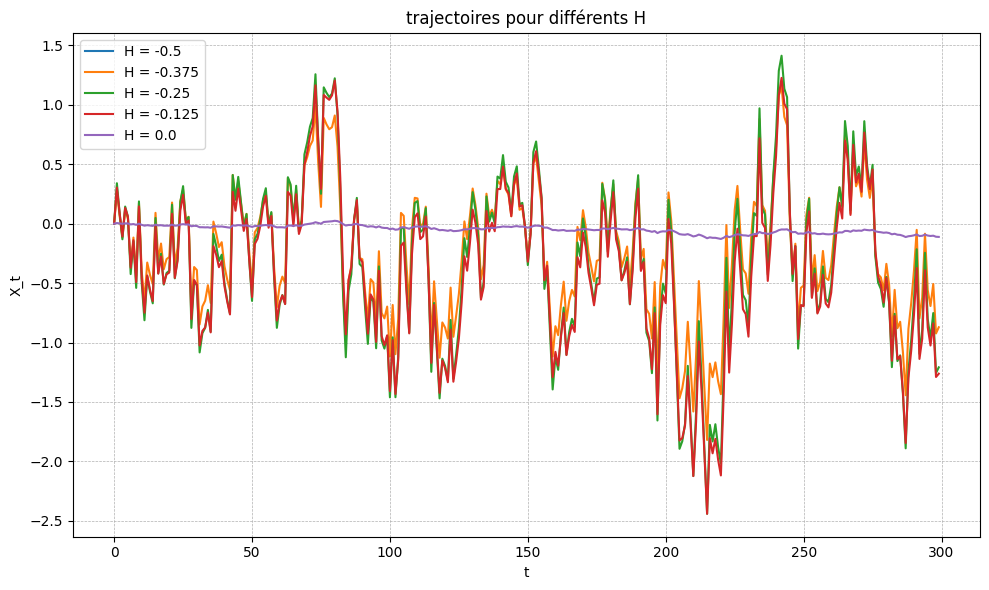

In [ ]:
plt.figure(figsize=(10, 6))

H_values = np.linspace(-0.5, 0, 5)

for h in H_values:
    plt.plot(
        factor_euler_1_m(t, h, Z, 5, 1 / 104),
        label=f'H = {h}'
    )

plt.title("trajectoires pour différents H")
plt.xlabel("t")
plt.ylabel("X_t")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

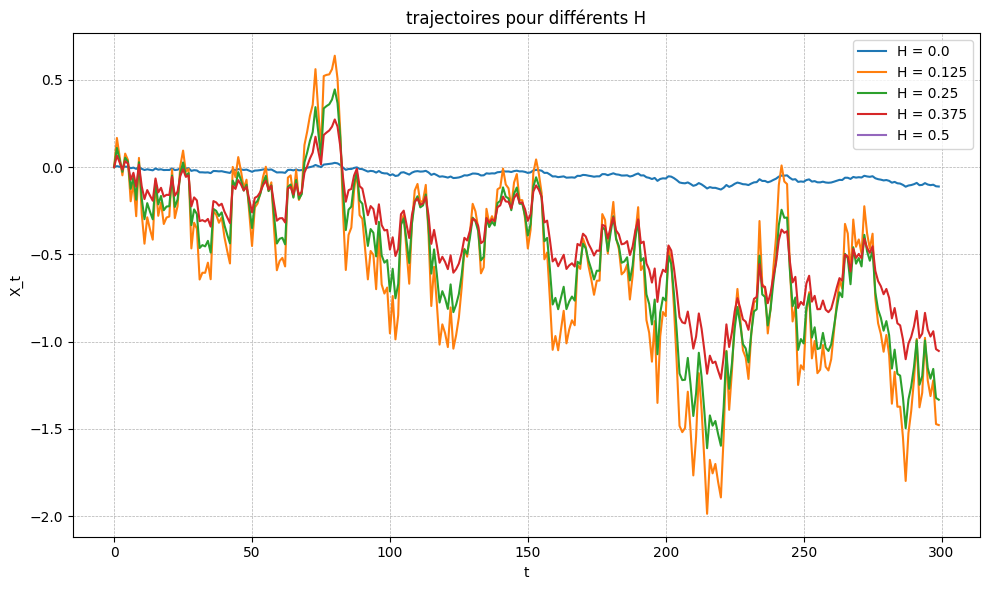

In [ ]:
plt.figure(figsize=(10, 6))

H = 0.1
H_values = np.linspace(0, 0.5, 5)

for h in H_values:
    plt.plot(
        factor_euler_1_m(t, h, Z, 5, 1 / 104),
        label=f'H = {h}'
    )

plt.title("trajectoires pour différents H")
plt.xlabel("t")
plt.ylabel("X_t")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
H_values = 0.5 * np.logspace(-2, 0, 10)
epsilons = [1/52, 1/104, 1/208, 1/416, 1/832, 0]
Z = np.random.normal(size=len(t))

mse_results = {eps: [] for eps in epsilons}

for H in H_values:
    X_ref = X_cholesky(t, H, Z)
    for eps in epsilons:
        if eps == 0:
            X_approx = factor_euler_1(t, H, Z, 5)
        else:
            X_approx = factor_euler_1_m(t, H, Z, 5, eps)
        mse = np.mean((X_ref - X_approx) ** 2) ** 0.5
        mse_results[eps].append(np.log(mse))

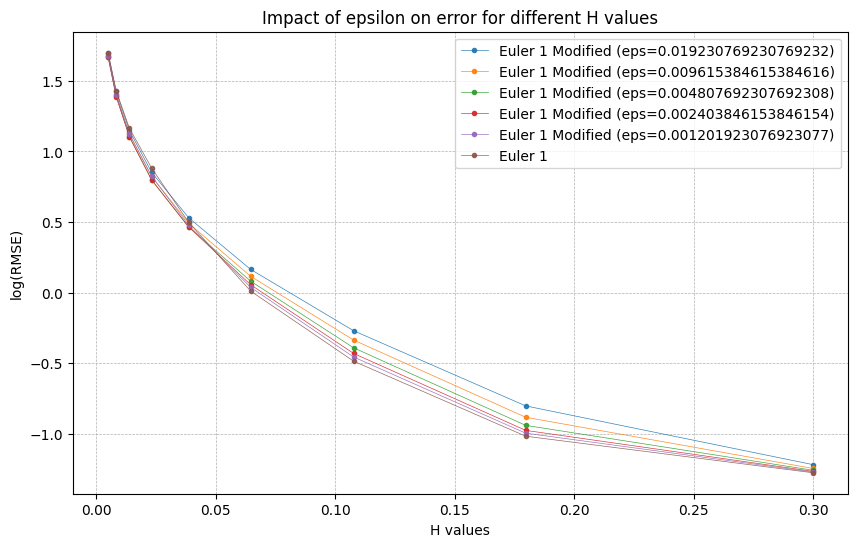

In [ ]:
plt.figure(figsize=(10, 6))
for eps, mse in mse_results.items():
  label = f"Euler 1 Modified (eps={eps})" if eps > 0 else "Euler 1"
  plt.plot(H_values, mse, marker='.', linewidth = 0.5, label=label, alpha = 0.9)

plt.title("Impact of epsilon on error for different H values")
plt.xlabel("H values")
plt.ylabel("log(RMSE)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
H_values = 0.5 * np.logspace(-2, 0, 20)
epsilons = [1/52, 1/104, 1/208, 1/416, 1/832, 1/(2*832), 1/(4*832), 0]

Z = np.random.normal(size=len(t))
mse_results = {eps: [] for eps in epsilons}

for H in H_values:
    X_ref = X_cholesky(t, H, Z)
    for eps in epsilons:
        if eps == 0:
            X_approx = factor_euler_1(t, H, Z, 10)
        else:
            X_approx = factor_euler_1_m(t, H, Z, 10, eps)
        mse = np.mean((X_ref - X_approx) ** 2) ** 0.5
        mse_results[eps].append(np.log(mse))

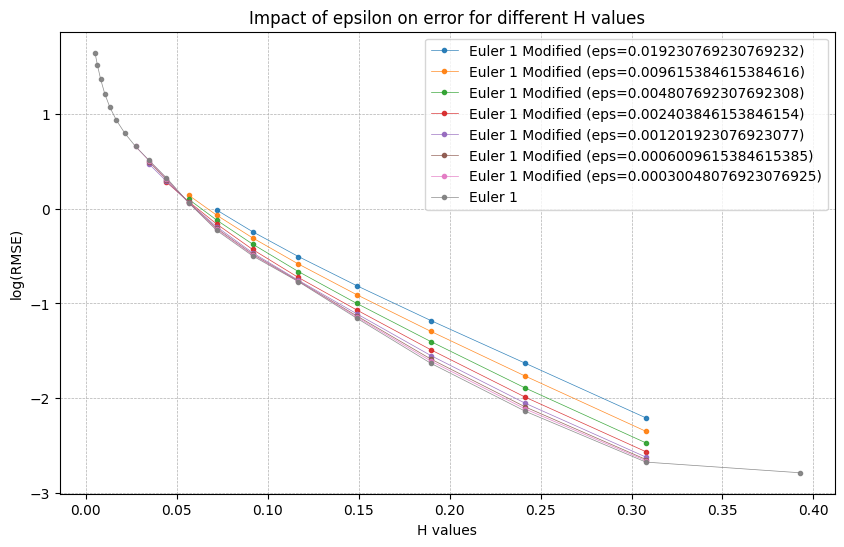

In [ ]:
plt.figure(figsize=(10, 6))
for eps, mse in mse_results.items():
  label = f"Euler 1 Modified (eps={eps})" if eps > 0 else "Euler 1"
  plt.plot(H_values, mse, marker='.', linewidth = 0.5, label=label, alpha = 0.9)

plt.title("Impact of epsilon on error for different H values")
plt.xlabel("H values")
plt.ylabel("log(RMSE)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

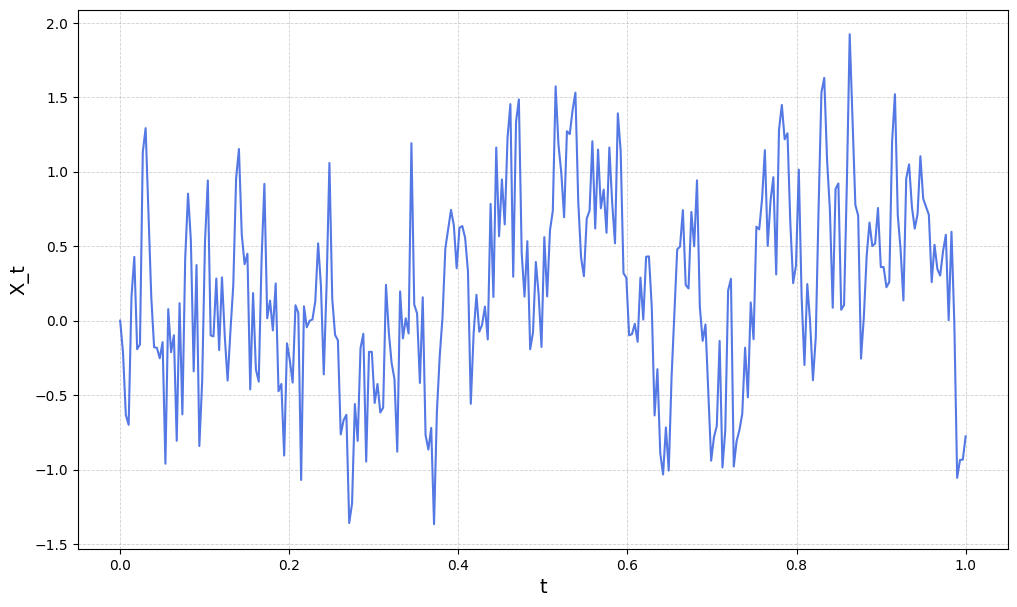

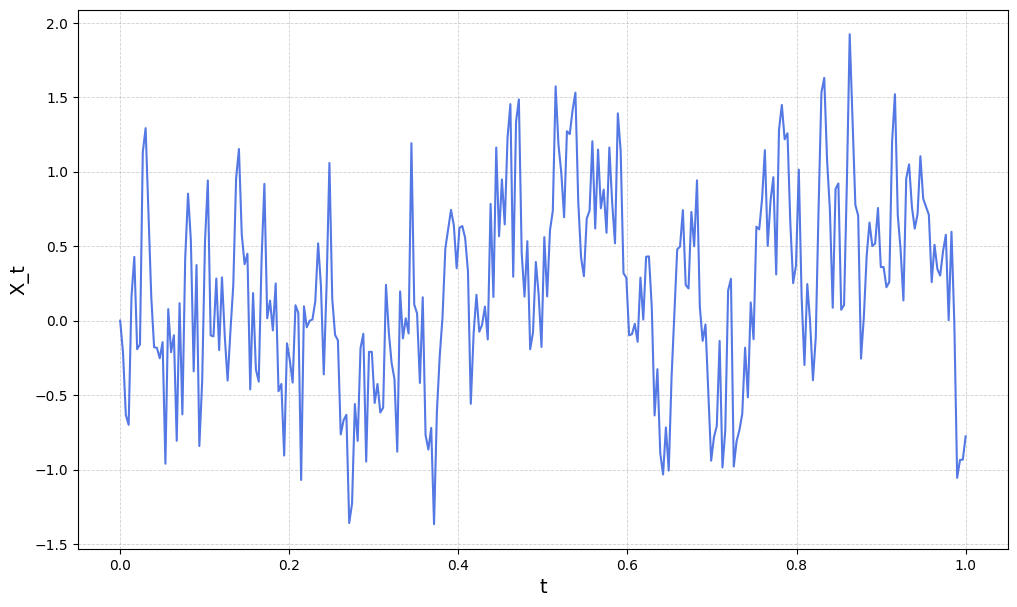

In [ ]:
def factor_euler_4_modified(t, H, Z, n, eps):
  r_ = r_val(n, H, 1.0)
  Y = np.zeros((n_step, n))
  for k in range(1, n):
    x_k = x2(r_, H + 1/2, n, k, eps)
    for i in range(1, n_step):
      Y[i, k] = (Y[i-1, k] + Z[i]*(dt)**(1/2))/(1 + x_k*dt)

  X = np.zeros(n_step)
  for k in range(1, n):
    X = X + nu * c2(r_, H + 1/2, n, k, eps) * Y[:, k]
  return X

# test
plot_schema(factor_euler_4_modified(t, 0.1, Z, 10, 0))
plot_schema(factor_euler_4(t, 0.1, Z, 10))

In [ ]:
H_values = 0.5 * np.logspace(-1, 0, 20)
epsilons = [1/52, 1/104, 1/208, 1/416, 1/832, 1/(832*2), 1/(832*4), 0]
Z = np.random.normal(size=len(t))

mse_results = {eps: [] for eps in epsilons}

for H in H_values:
    X_ref = X_cholesky(t, H, Z)
    for eps in epsilons:
        if eps == 0:
            X_approx = factor_euler_1(t, H, Z, 10)
        else:
            X_approx = factor_euler_4_modified(t, H, Z, 10, eps)
        mse = np.mean((X_ref - X_approx) ** 2) ** 0.5
        mse_results[eps].append(np.log(mse))

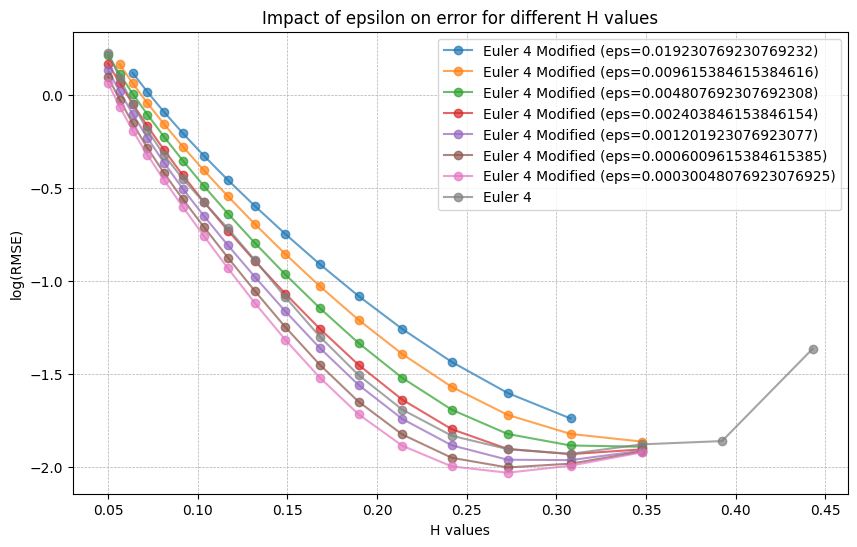

In [ ]:
plt.figure(figsize=(10, 6))
for eps, mse in mse_results.items():
  label = f"Euler 4 Modified (eps={eps})" if eps > 0 else "Euler 4"
  plt.plot(H_values, mse, marker='o', label=label, alpha = 0.7)

plt.title("Impact of epsilon on error for different H values")
plt.xlabel("H values")
plt.ylabel("log(RMSE)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()